In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from Utils import test_env, utils
from Utils import HP_tuning 
from Utils.supervised import *

from RelationalModule import AC_networks as nets

from importlib import reload

In [2]:
reload(HP_tuning)

<module 'Utils.HP_tuning' from '/m/home/home9/94/dainesn1/unix/Workdir/RelationalDeepRL/Utils/HP_tuning.py'>

In [3]:
class EvalSandboxModel():
    def __init__(self, model, model_spec, game_params, n_epochs=50, n_samples=10000):
        self.model = model
        self.model_spec = model_spec
        self.game_params = game_params
        self.n_epochs = n_epochs
        self.n_samples = n_samples
        
    def evaluate_params(self, HPs, lambdas):
        train_V_lambda = [] 
        val_V_lambda = []
        for lr in lambdas:
            net = self.model(**self.model_spec, **HPs)
            results = supervised_training(net, lr, self.n_epochs, self.n_samples, 
                                          self.game_params, get_probs=True)
            trained_net, train_loss, val_loss, dataloader_dict, state_set, action_set, env = results
            
            train_V = 1-np.array(train_loss)
            train_V_lambda.append(train_V)
            
            val_V = 1-np.array(val_loss)
            val_V_lambda.append(val_V)
            
        return np.array(train_V_lambda), np.array(val_V_lambda)

In [4]:
# Variable parameters
X = 10
Y = 10
initial = [0,0]
goal = [2,2]
MAX_STEPS = 25

game_params = dict(x=X, y=Y, initial=initial, goal=goal, max_steps=MAX_STEPS, 
                   greyscale_state=True, return_ohe=True)

In [5]:
model = nets.GatedBoxWorldActor
model_spec = dict(action_space=4)

In [6]:
eval_instance = EvalSandboxModel(model, model_spec, game_params, 50, 10000)

In [7]:
value_priors_dict = {'n_kernels':([12, 24, 36], [1/3, 1/3, 1/3]),
                     'n_features':([16, 32, 64, 128, 256], [0.15, 0.2, 0.3, 0.2, 0.15]),
                     'n_heads':([1, 2, 4, 8],[0.1, 0.4, 0.4, 0.1]),
                     'n_attn_modules':([2,4,6,8],[1/4, 1/4, 1/4, 1/4]),
                     'feature_hidden_dim':([16, 32, 64, 128, 256], [0.15, 0.2, 0.3, 0.2, 0.15]),
                     'feature_n_residuals':([1, 2, 4, 8],[0.1, 0.4, 0.4, 0.1])
                     }

In [8]:
bayes_HP_tuning = HP_tuning.BayesHPTuning(value_priors_dict, eval_instance)

In [10]:
for i in range(48):
    bayes_HP_tuning.step()


Configuration sampled: 
	n_kernels :  24  - prob: 0.32
	n_features :  16  - prob: 0.16
	n_heads :  2  - prob: 0.46
	n_attn_modules :  8  - prob: 0.25
	feature_hidden_dim :  256  - prob: 0.16
	feature_n_residuals :  2  - prob: 0.32

Creating dataset...

Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2592 took: 3.47s  Val. loss: 0.2596
Epoch 2, 100% 	 Train loss: 0.2583 took: 3.55s  Val. loss: 0.2602
Epoch 3, 100% 	 Train loss: 0.2575 took: 3.71s  Val. loss: 0.2568
Epoch 4, 100% 	 Train loss: 0.2575 took: 3.72s  Val. loss: 0.2572
Epoch 5, 100% 	 Train loss: 0.2575 took: 3.73s  Val. loss: 0.2596
Epoch 6, 100% 	 Train loss: 0.2576 took: 3.57s  Val. loss: 0.2566
Epoch 7, 100% 	 Train loss: 0.2574 took: 3.70s  Val. loss: 0.2573
Epoch 8, 100% 	 Train loss: 0.2573 took: 3.74s  Val. loss: 0.2567
Epoch 9, 100% 	 Train loss: 0.2575 took: 3.62s  Val. loss: 0.2573
Epoch 10, 100% 	 Train loss: 0.2574 took: 3.39s  Val. loss: 0.2557
Epoch 11, 100% 	 Train loss: 0.2

Epoch 14, 100% 	 Train loss: 0.2583 took: 3.42s  Val. loss: 0.2636
Epoch 15, 100% 	 Train loss: 0.2584 took: 3.43s  Val. loss: 0.2622
Epoch 16, 100% 	 Train loss: 0.2584 took: 3.69s  Val. loss: 0.2634
Epoch 17, 100% 	 Train loss: 0.2584 took: 3.73s  Val. loss: 0.2624
Epoch 18, 100% 	 Train loss: 0.2584 took: 3.73s  Val. loss: 0.2622
Epoch 19, 100% 	 Train loss: 0.2584 took: 3.72s  Val. loss: 0.2626
Epoch 20, 100% 	 Train loss: 0.2585 took: 3.74s  Val. loss: 0.2626
Epoch 21, 100% 	 Train loss: 0.2584 took: 3.72s  Val. loss: 0.2628
Epoch 22, 100% 	 Train loss: 0.2584 took: 3.72s  Val. loss: 0.2640
Epoch 23, 100% 	 Train loss: 0.2584 took: 3.76s  Val. loss: 0.2635
Epoch 24, 100% 	 Train loss: 0.2583 took: 3.73s  Val. loss: 0.2622
Epoch 25, 100% 	 Train loss: 0.2584 took: 3.75s  Val. loss: 0.2630
Epoch 26, 100% 	 Train loss: 0.2584 took: 3.73s  Val. loss: 0.2628
Epoch 27, 100% 	 Train loss: 0.2584 took: 3.73s  Val. loss: 0.2630
Epoch 28, 100% 	 Train loss: 0.2584 took: 3.74s  Val. loss: 0.

Epoch 22, 100% 	 Train loss: 0.2574 took: 4.34s  Val. loss: 0.2627
Epoch 23, 100% 	 Train loss: 0.2574 took: 4.37s  Val. loss: 0.2636
Epoch 24, 100% 	 Train loss: 0.2575 took: 4.36s  Val. loss: 0.2621
Epoch 25, 100% 	 Train loss: 0.2575 took: 4.35s  Val. loss: 0.2636
Epoch 26, 100% 	 Train loss: 0.2576 took: 4.33s  Val. loss: 0.2634
Epoch 27, 100% 	 Train loss: 0.2577 took: 3.91s  Val. loss: 0.2611
Epoch 28, 100% 	 Train loss: 0.2575 took: 3.37s  Val. loss: 0.2631
Epoch 29, 100% 	 Train loss: 0.2574 took: 3.39s  Val. loss: 0.2632
Epoch 30, 100% 	 Train loss: 0.2575 took: 3.00s  Val. loss: 0.2641
Epoch 31, 100% 	 Train loss: 0.2575 took: 2.99s  Val. loss: 0.2653
Epoch 32, 100% 	 Train loss: 0.2575 took: 3.00s  Val. loss: 0.2621
Epoch 33, 100% 	 Train loss: 0.2574 took: 2.99s  Val. loss: 0.2618
Epoch 34, 100% 	 Train loss: 0.2573 took: 2.99s  Val. loss: 0.2621
Epoch 35, 100% 	 Train loss: 0.2575 took: 3.00s  Val. loss: 0.2654
Epoch 36, 100% 	 Train loss: 0.2576 took: 2.99s  Val. loss: 0.

Epoch 30, 100% 	 Train loss: 0.2555 took: 4.80s  Val. loss: 0.2541
Epoch 31, 100% 	 Train loss: 0.2554 took: 4.81s  Val. loss: 0.2540
Epoch 32, 100% 	 Train loss: 0.2557 took: 4.81s  Val. loss: 0.2538
Epoch 33, 100% 	 Train loss: 0.2556 took: 4.81s  Val. loss: 0.2532
Epoch 34, 100% 	 Train loss: 0.2558 took: 4.80s  Val. loss: 0.2549
Epoch 35, 100% 	 Train loss: 0.2556 took: 4.80s  Val. loss: 0.2532
Epoch 36, 100% 	 Train loss: 0.2556 took: 4.80s  Val. loss: 0.2536
Epoch 37, 100% 	 Train loss: 0.2556 took: 4.80s  Val. loss: 0.2536
Epoch 38, 100% 	 Train loss: 0.2556 took: 4.80s  Val. loss: 0.2528
Epoch 39, 100% 	 Train loss: 0.2555 took: 4.80s  Val. loss: 0.2543
Epoch 40, 100% 	 Train loss: 0.2556 took: 4.80s  Val. loss: 0.2529
Epoch 41, 100% 	 Train loss: 0.2556 took: 4.80s  Val. loss: 0.2534
Epoch 42, 100% 	 Train loss: 0.2556 took: 4.81s  Val. loss: 0.2538
Epoch 43, 100% 	 Train loss: 0.2555 took: 4.81s  Val. loss: 0.2538
Epoch 44, 100% 	 Train loss: 0.2555 took: 4.81s  Val. loss: 0.

Epoch 49, 100% 	 Train loss: 0.2573 took: 4.81s  Val. loss: 0.2570
Epoch 50, 100% 	 Train loss: 0.2572 took: 4.81s  Val. loss: 0.2583
Training finished, took 267.78s

Configuration sampled: 
	n_kernels :  36  - prob: 0.34
	n_features :  64  - prob: 0.26
	n_heads :  8  - prob: 0.13
	n_attn_modules :  8  - prob: 0.24
	feature_hidden_dim :  256  - prob: 0.17
	feature_n_residuals :  8  - prob: 0.13
lambda: 0.0050 - V: 0.745971
lambda: 0.0010 - V: 0.742964
lambda: 0.0005 - V: 0.742850
Average V: 0.743928
Time elapsed: 805.88 s

Configuration sampled: 
	n_kernels :  36  - prob: 0.34
	n_features :  64  - prob: 0.25
	n_heads :  2  - prob: 0.35
	n_attn_modules :  6  - prob: 0.24
	feature_hidden_dim :  256  - prob: 0.17
	feature_n_residuals :  2  - prob: 0.30

Creating dataset...

Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2663 took: 2.88s  Val. loss: 0.2549
Epoch 2, 100% 	 Train loss: 0.2630 took: 2.88s  Val. loss: 0.2533
Epoch 3, 100% 	 Train loss: 0.261

Epoch 5, 100% 	 Train loss: 0.2578 took: 2.86s  Val. loss: 0.2484
Epoch 6, 100% 	 Train loss: 0.2577 took: 2.85s  Val. loss: 0.2474
Epoch 7, 100% 	 Train loss: 0.2577 took: 2.86s  Val. loss: 0.2478
Epoch 8, 100% 	 Train loss: 0.2580 took: 2.86s  Val. loss: 0.2478
Epoch 9, 100% 	 Train loss: 0.2577 took: 2.86s  Val. loss: 0.2478
Epoch 10, 100% 	 Train loss: 0.2577 took: 2.86s  Val. loss: 0.2476
Epoch 11, 100% 	 Train loss: 0.2577 took: 2.88s  Val. loss: 0.2488
Epoch 12, 100% 	 Train loss: 0.2579 took: 2.86s  Val. loss: 0.2477
Epoch 13, 100% 	 Train loss: 0.2578 took: 2.87s  Val. loss: 0.2471
Epoch 14, 100% 	 Train loss: 0.2576 took: 2.87s  Val. loss: 0.2475
Epoch 15, 100% 	 Train loss: 0.2576 took: 2.86s  Val. loss: 0.2496
Epoch 16, 100% 	 Train loss: 0.2578 took: 2.87s  Val. loss: 0.2477
Epoch 17, 100% 	 Train loss: 0.2576 took: 2.86s  Val. loss: 0.2479
Epoch 18, 100% 	 Train loss: 0.2577 took: 2.86s  Val. loss: 0.2477
Epoch 19, 100% 	 Train loss: 0.2577 took: 2.86s  Val. loss: 0.2478


Epoch 13, 100% 	 Train loss: 0.2589 took: 6.63s  Val. loss: 0.2602
Epoch 14, 100% 	 Train loss: 0.2590 took: 6.63s  Val. loss: 0.2602
Epoch 15, 100% 	 Train loss: 0.2588 took: 6.63s  Val. loss: 0.2589
Epoch 16, 100% 	 Train loss: 0.2488 took: 6.63s  Val. loss: 0.2217
Epoch 17, 100% 	 Train loss: 0.2006 took: 6.63s  Val. loss: 0.1771
Epoch 18, 100% 	 Train loss: 0.1715 took: 6.63s  Val. loss: 0.1675
Epoch 19, 100% 	 Train loss: 0.1668 took: 6.63s  Val. loss: 0.1643
Epoch 20, 100% 	 Train loss: 0.1613 took: 6.63s  Val. loss: 0.1624
Epoch 21, 100% 	 Train loss: 0.1618 took: 6.63s  Val. loss: 0.1640
Epoch 22, 100% 	 Train loss: 0.1597 took: 6.64s  Val. loss: 0.1580
Epoch 23, 100% 	 Train loss: 0.1579 took: 6.64s  Val. loss: 0.1576
Epoch 24, 100% 	 Train loss: 0.1593 took: 6.65s  Val. loss: 0.1638
Epoch 25, 100% 	 Train loss: 0.1572 took: 6.65s  Val. loss: 0.1585
Epoch 26, 100% 	 Train loss: 0.1572 took: 6.65s  Val. loss: 0.1596
Epoch 27, 100% 	 Train loss: 0.1563 took: 6.65s  Val. loss: 0.

Epoch 21, 100% 	 Train loss: 0.2609 took: 6.94s  Val. loss: 0.2587
Epoch 22, 100% 	 Train loss: 0.2611 took: 6.94s  Val. loss: 0.2606
Epoch 23, 100% 	 Train loss: 0.2608 took: 6.94s  Val. loss: 0.2584
Epoch 24, 100% 	 Train loss: 0.2611 took: 6.94s  Val. loss: 0.2597
Epoch 25, 100% 	 Train loss: 0.2607 took: 6.94s  Val. loss: 0.2570
Epoch 26, 100% 	 Train loss: 0.2606 took: 6.94s  Val. loss: 0.2576
Epoch 27, 100% 	 Train loss: 0.2607 took: 6.94s  Val. loss: 0.2590
Epoch 28, 100% 	 Train loss: 0.2607 took: 6.94s  Val. loss: 0.2586
Epoch 29, 100% 	 Train loss: 0.2606 took: 6.93s  Val. loss: 0.2586
Epoch 30, 100% 	 Train loss: 0.2605 took: 6.94s  Val. loss: 0.2593
Epoch 31, 100% 	 Train loss: 0.2605 took: 6.94s  Val. loss: 0.2590
Epoch 32, 100% 	 Train loss: 0.2605 took: 6.94s  Val. loss: 0.2583
Epoch 33, 100% 	 Train loss: 0.2605 took: 6.94s  Val. loss: 0.2593
Epoch 34, 100% 	 Train loss: 0.2607 took: 6.96s  Val. loss: 0.2582
Epoch 35, 100% 	 Train loss: 0.2606 took: 6.99s  Val. loss: 0.

Epoch 40, 100% 	 Train loss: 0.2573 took: 6.94s  Val. loss: 0.2660
Epoch 41, 100% 	 Train loss: 0.2573 took: 6.94s  Val. loss: 0.2657
Epoch 42, 100% 	 Train loss: 0.2576 took: 6.96s  Val. loss: 0.2644
Epoch 43, 100% 	 Train loss: 0.2574 took: 6.99s  Val. loss: 0.2650
Epoch 44, 100% 	 Train loss: 0.2574 took: 6.99s  Val. loss: 0.2653
Epoch 45, 100% 	 Train loss: 0.2575 took: 6.98s  Val. loss: 0.2653
Epoch 46, 100% 	 Train loss: 0.2573 took: 6.98s  Val. loss: 0.2648
Epoch 47, 100% 	 Train loss: 0.2574 took: 7.04s  Val. loss: 0.2646
Epoch 48, 100% 	 Train loss: 0.2574 took: 7.02s  Val. loss: 0.2656
Epoch 49, 100% 	 Train loss: 0.2575 took: 7.03s  Val. loss: 0.2661
Epoch 50, 100% 	 Train loss: 0.2573 took: 6.94s  Val. loss: 0.2650
Training finished, took 383.91s

Configuration sampled: 
	n_kernels :  12  - prob: 0.33
	n_features :  128  - prob: 0.21
	n_heads :  8  - prob: 0.16
	n_attn_modules :  8  - prob: 0.24
	feature_hidden_dim :  128  - prob: 0.20
	feature_n_residuals :  4  - prob: 0.4

Epoch 48, 100% 	 Train loss: 0.2597 took: 6.21s  Val. loss: 0.2618
Epoch 49, 100% 	 Train loss: 0.2597 took: 6.22s  Val. loss: 0.2620
Epoch 50, 100% 	 Train loss: 0.2597 took: 6.22s  Val. loss: 0.2606
Training finished, took 344.90s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2588 took: 6.23s  Val. loss: 0.2586
Epoch 2, 100% 	 Train loss: 0.2583 took: 6.23s  Val. loss: 0.2590
Epoch 3, 100% 	 Train loss: 0.2581 took: 6.23s  Val. loss: 0.2588
Epoch 4, 100% 	 Train loss: 0.2583 took: 6.23s  Val. loss: 0.2578
Epoch 5, 100% 	 Train loss: 0.2583 took: 6.22s  Val. loss: 0.2576
Epoch 6, 100% 	 Train loss: 0.2588 took: 6.23s  Val. loss: 0.2591
Epoch 7, 100% 	 Train loss: 0.2581 took: 6.23s  Val. loss: 0.2581
Epoch 8, 100% 	 Train loss: 0.2581 took: 6.23s  Val. loss: 0.2600
Epoch 9, 100% 	 Train loss: 0.2582 took: 6.23s  Val. loss: 0.2599
Epoch 10, 100% 	 Train loss: 0.2582 took: 6.23s  Val. loss: 0.2574
Epoch 11, 100% 	 Train loss: 0.

Epoch 4, 100% 	 Train loss: 0.1914 took: 1.32s  Val. loss: 0.1785
Epoch 5, 100% 	 Train loss: 0.1658 took: 1.31s  Val. loss: 0.1675
Epoch 6, 100% 	 Train loss: 0.1527 took: 1.31s  Val. loss: 0.1535
Epoch 7, 100% 	 Train loss: 0.1458 took: 1.32s  Val. loss: 0.1595
Epoch 8, 100% 	 Train loss: 0.1403 took: 1.33s  Val. loss: 0.1419
Epoch 9, 100% 	 Train loss: 0.1363 took: 1.32s  Val. loss: 0.1359
Epoch 10, 100% 	 Train loss: 0.1286 took: 1.33s  Val. loss: 0.1297
Epoch 11, 100% 	 Train loss: 0.1200 took: 1.32s  Val. loss: 0.1247
Epoch 12, 100% 	 Train loss: 0.1201 took: 1.33s  Val. loss: 0.1213
Epoch 13, 100% 	 Train loss: 0.1133 took: 1.33s  Val. loss: 0.1156
Epoch 14, 100% 	 Train loss: 0.1099 took: 1.30s  Val. loss: 0.1134
Epoch 15, 100% 	 Train loss: 0.1080 took: 1.30s  Val. loss: 0.1103
Epoch 16, 100% 	 Train loss: 0.1062 took: 1.32s  Val. loss: 0.1072
Epoch 17, 100% 	 Train loss: 0.1011 took: 1.31s  Val. loss: 0.1095
Epoch 18, 100% 	 Train loss: 0.1012 took: 1.31s  Val. loss: 0.0992
E

Epoch 12, 100% 	 Train loss: 0.2572 took: 5.69s  Val. loss: 0.2583
Epoch 13, 100% 	 Train loss: 0.2570 took: 5.67s  Val. loss: 0.2606
Epoch 14, 100% 	 Train loss: 0.2571 took: 5.67s  Val. loss: 0.2582
Epoch 15, 100% 	 Train loss: 0.2571 took: 5.67s  Val. loss: 0.2588
Epoch 16, 100% 	 Train loss: 0.2569 took: 5.69s  Val. loss: 0.2602
Epoch 17, 100% 	 Train loss: 0.2571 took: 5.69s  Val. loss: 0.2597
Epoch 18, 100% 	 Train loss: 0.2571 took: 5.65s  Val. loss: 0.2601
Epoch 19, 100% 	 Train loss: 0.2569 took: 5.68s  Val. loss: 0.2591
Epoch 20, 100% 	 Train loss: 0.2569 took: 5.70s  Val. loss: 0.2592
Epoch 21, 100% 	 Train loss: 0.2573 took: 5.67s  Val. loss: 0.2590
Epoch 22, 100% 	 Train loss: 0.2573 took: 5.69s  Val. loss: 0.2596
Epoch 23, 100% 	 Train loss: 0.2571 took: 5.72s  Val. loss: 0.2581
Epoch 24, 100% 	 Train loss: 0.2568 took: 5.70s  Val. loss: 0.2585
Epoch 25, 100% 	 Train loss: 0.2568 took: 5.69s  Val. loss: 0.2590
Epoch 26, 100% 	 Train loss: 0.2569 took: 5.70s  Val. loss: 0.

Epoch 31, 100% 	 Train loss: 0.2594 took: 5.41s  Val. loss: 0.2534
Epoch 32, 100% 	 Train loss: 0.2595 took: 5.43s  Val. loss: 0.2532
Epoch 33, 100% 	 Train loss: 0.2595 took: 5.42s  Val. loss: 0.2520
Epoch 34, 100% 	 Train loss: 0.2595 took: 5.44s  Val. loss: 0.2529
Epoch 35, 100% 	 Train loss: 0.2596 took: 5.42s  Val. loss: 0.2535
Epoch 36, 100% 	 Train loss: 0.2597 took: 5.43s  Val. loss: 0.2521
Epoch 37, 100% 	 Train loss: 0.2595 took: 5.50s  Val. loss: 0.2540
Epoch 38, 100% 	 Train loss: 0.2596 took: 5.71s  Val. loss: 0.2525
Epoch 39, 100% 	 Train loss: 0.2594 took: 5.74s  Val. loss: 0.2531
Epoch 40, 100% 	 Train loss: 0.2597 took: 5.71s  Val. loss: 0.2527
Epoch 41, 100% 	 Train loss: 0.2595 took: 5.73s  Val. loss: 0.2525
Epoch 42, 100% 	 Train loss: 0.2593 took: 5.71s  Val. loss: 0.2529
Epoch 43, 100% 	 Train loss: 0.2594 took: 5.70s  Val. loss: 0.2526
Epoch 44, 100% 	 Train loss: 0.2594 took: 5.70s  Val. loss: 0.2523
Epoch 45, 100% 	 Train loss: 0.2593 took: 5.72s  Val. loss: 0.

Epoch 39, 100% 	 Train loss: 0.0880 took: 2.68s  Val. loss: 0.0844
Epoch 40, 100% 	 Train loss: 0.0856 took: 2.61s  Val. loss: 0.0805
Epoch 41, 100% 	 Train loss: 0.0849 took: 2.67s  Val. loss: 0.0832
Epoch 42, 100% 	 Train loss: 0.0842 took: 2.70s  Val. loss: 0.0861
Epoch 43, 100% 	 Train loss: 0.0854 took: 2.68s  Val. loss: 0.0806
Epoch 44, 100% 	 Train loss: 0.0820 took: 2.66s  Val. loss: 0.0838
Epoch 45, 100% 	 Train loss: 0.0850 took: 2.67s  Val. loss: 0.0792
Epoch 46, 100% 	 Train loss: 0.0833 took: 2.68s  Val. loss: 0.0824
Epoch 47, 100% 	 Train loss: 0.0823 took: 2.67s  Val. loss: 0.0945
Epoch 48, 100% 	 Train loss: 0.0904 took: 2.68s  Val. loss: 0.0866
Epoch 49, 100% 	 Train loss: 0.0856 took: 2.67s  Val. loss: 0.0805
Epoch 50, 100% 	 Train loss: 0.0814 took: 2.66s  Val. loss: 0.0790
Training finished, took 146.97s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2570 took: 2.69s  Val. loss: 0.2491
Epoch 2, 100% 	 Train l

Epoch 47, 100% 	 Train loss: 0.0723 took: 7.98s  Val. loss: 0.0746
Epoch 48, 100% 	 Train loss: 0.0714 took: 8.00s  Val. loss: 0.0776
Epoch 49, 100% 	 Train loss: 0.0729 took: 8.00s  Val. loss: 0.0800
Epoch 50, 100% 	 Train loss: 0.0738 took: 7.99s  Val. loss: 0.0871
Training finished, took 438.39s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2617 took: 8.00s  Val. loss: 0.2579
Epoch 2, 100% 	 Train loss: 0.2597 took: 7.99s  Val. loss: 0.2584
Epoch 3, 100% 	 Train loss: 0.2592 took: 8.00s  Val. loss: 0.2572
Epoch 4, 100% 	 Train loss: 0.2591 took: 7.97s  Val. loss: 0.2587
Epoch 5, 100% 	 Train loss: 0.2589 took: 8.02s  Val. loss: 0.2579
Epoch 6, 100% 	 Train loss: 0.2585 took: 7.99s  Val. loss: 0.2567
Epoch 7, 100% 	 Train loss: 0.2585 took: 7.98s  Val. loss: 0.2580
Epoch 8, 100% 	 Train loss: 0.2585 took: 8.01s  Val. loss: 0.2576
Epoch 9, 100% 	 Train loss: 0.2586 took: 8.02s  Val. loss: 0.2569
Epoch 10, 100% 	 Train loss: 0.

Epoch 3, 100% 	 Train loss: 0.2574 took: 3.16s  Val. loss: 0.2596
Epoch 4, 100% 	 Train loss: 0.2573 took: 3.15s  Val. loss: 0.2591
Epoch 5, 100% 	 Train loss: 0.2572 took: 3.16s  Val. loss: 0.2590
Epoch 6, 100% 	 Train loss: 0.2571 took: 3.17s  Val. loss: 0.2583
Epoch 7, 100% 	 Train loss: 0.2567 took: 3.14s  Val. loss: 0.2578
Epoch 8, 100% 	 Train loss: 0.2114 took: 3.16s  Val. loss: 0.1626
Epoch 9, 100% 	 Train loss: 0.1539 took: 3.17s  Val. loss: 0.1481
Epoch 10, 100% 	 Train loss: 0.1312 took: 3.19s  Val. loss: 0.1203
Epoch 11, 100% 	 Train loss: 0.1151 took: 3.18s  Val. loss: 0.1116
Epoch 12, 100% 	 Train loss: 0.1001 took: 3.15s  Val. loss: 0.0947
Epoch 13, 100% 	 Train loss: 0.0955 took: 3.15s  Val. loss: 0.0986
Epoch 14, 100% 	 Train loss: 0.0864 took: 3.11s  Val. loss: 0.0944
Epoch 15, 100% 	 Train loss: 0.0873 took: 3.15s  Val. loss: 0.0901
Epoch 16, 100% 	 Train loss: 0.0837 took: 3.15s  Val. loss: 0.0861
Epoch 17, 100% 	 Train loss: 0.0810 took: 3.13s  Val. loss: 0.0828
Ep

Epoch 22, 100% 	 Train loss: 0.0836 took: 3.16s  Val. loss: 0.0831
Epoch 23, 100% 	 Train loss: 0.0804 took: 3.14s  Val. loss: 0.0792
Epoch 24, 100% 	 Train loss: 0.0799 took: 3.14s  Val. loss: 0.0827
Epoch 25, 100% 	 Train loss: 0.0828 took: 3.13s  Val. loss: 0.0801
Epoch 26, 100% 	 Train loss: 0.0793 took: 3.12s  Val. loss: 0.0848
Epoch 27, 100% 	 Train loss: 0.0813 took: 3.13s  Val. loss: 0.0784
Epoch 28, 100% 	 Train loss: 0.0788 took: 3.13s  Val. loss: 0.0836
Epoch 29, 100% 	 Train loss: 0.0764 took: 3.12s  Val. loss: 0.0774
Epoch 30, 100% 	 Train loss: 0.0770 took: 2.52s  Val. loss: 0.0776
Epoch 31, 100% 	 Train loss: 0.0758 took: 2.55s  Val. loss: 0.0796
Epoch 32, 100% 	 Train loss: 0.0772 took: 2.30s  Val. loss: 0.0862
Epoch 33, 100% 	 Train loss: 0.0761 took: 2.25s  Val. loss: 0.0767
Epoch 34, 100% 	 Train loss: 0.0756 took: 2.25s  Val. loss: 0.0770
Epoch 35, 100% 	 Train loss: 0.0760 took: 2.25s  Val. loss: 0.0779
Epoch 36, 100% 	 Train loss: 0.0766 took: 2.25s  Val. loss: 0.

Epoch 30, 100% 	 Train loss: 0.0737 took: 1.38s  Val. loss: 0.0743
Epoch 31, 100% 	 Train loss: 0.0740 took: 1.38s  Val. loss: 0.0754
Epoch 32, 100% 	 Train loss: 0.0739 took: 1.38s  Val. loss: 0.0729
Epoch 33, 100% 	 Train loss: 0.0734 took: 1.38s  Val. loss: 0.0747
Epoch 34, 100% 	 Train loss: 0.0725 took: 1.38s  Val. loss: 0.0733
Epoch 35, 100% 	 Train loss: 0.0725 took: 1.38s  Val. loss: 0.0743
Epoch 36, 100% 	 Train loss: 0.0718 took: 1.38s  Val. loss: 0.0781
Epoch 37, 100% 	 Train loss: 0.0728 took: 1.38s  Val. loss: 0.0743
Epoch 38, 100% 	 Train loss: 0.0719 took: 1.37s  Val. loss: 0.0756
Epoch 39, 100% 	 Train loss: 0.0722 took: 1.38s  Val. loss: 0.0736
Epoch 40, 100% 	 Train loss: 0.0723 took: 1.40s  Val. loss: 0.0729
Epoch 41, 100% 	 Train loss: 0.0724 took: 1.38s  Val. loss: 0.0708
Epoch 42, 100% 	 Train loss: 0.0712 took: 1.37s  Val. loss: 0.0742
Epoch 43, 100% 	 Train loss: 0.0716 took: 1.38s  Val. loss: 0.0741
Epoch 44, 100% 	 Train loss: 0.0725 took: 1.38s  Val. loss: 0.

Epoch 38, 100% 	 Train loss: 0.2560 took: 3.24s  Val. loss: 0.2583
Epoch 39, 100% 	 Train loss: 0.2560 took: 3.23s  Val. loss: 0.2576
Epoch 40, 100% 	 Train loss: 0.2561 took: 3.23s  Val. loss: 0.2589
Epoch 41, 100% 	 Train loss: 0.2560 took: 3.23s  Val. loss: 0.2575
Epoch 42, 100% 	 Train loss: 0.2560 took: 3.24s  Val. loss: 0.2589
Epoch 43, 100% 	 Train loss: 0.2560 took: 3.23s  Val. loss: 0.2586
Epoch 44, 100% 	 Train loss: 0.2560 took: 3.45s  Val. loss: 0.2584
Epoch 45, 100% 	 Train loss: 0.2561 took: 3.59s  Val. loss: 0.2585
Epoch 46, 100% 	 Train loss: 0.2560 took: 3.62s  Val. loss: 0.2589
Epoch 47, 100% 	 Train loss: 0.2560 took: 3.60s  Val. loss: 0.2579
Epoch 48, 100% 	 Train loss: 0.2560 took: 3.61s  Val. loss: 0.2586
Epoch 49, 100% 	 Train loss: 0.2559 took: 3.32s  Val. loss: 0.2585
Epoch 50, 100% 	 Train loss: 0.2560 took: 3.24s  Val. loss: 0.2591
Training finished, took 183.11s

Creating dataset...

Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train 


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2722 took: 6.92s  Val. loss: 0.2585
Epoch 2, 100% 	 Train loss: 0.2605 took: 6.92s  Val. loss: 0.2545
Epoch 3, 100% 	 Train loss: 0.2214 took: 6.93s  Val. loss: 0.1937
Epoch 4, 100% 	 Train loss: 0.1505 took: 6.94s  Val. loss: 0.1267
Epoch 5, 100% 	 Train loss: 0.1177 took: 6.94s  Val. loss: 0.1026
Epoch 6, 100% 	 Train loss: 0.1035 took: 6.94s  Val. loss: 0.0986
Epoch 7, 100% 	 Train loss: 0.0920 took: 6.94s  Val. loss: 0.0877
Epoch 8, 100% 	 Train loss: 0.0879 took: 6.95s  Val. loss: 0.0882
Epoch 9, 100% 	 Train loss: 0.0863 took: 6.95s  Val. loss: 0.0820
Epoch 10, 100% 	 Train loss: 0.0831 took: 6.95s  Val. loss: 0.0801
Epoch 11, 100% 	 Train loss: 0.0815 took: 6.95s  Val. loss: 0.0861
Epoch 12, 100% 	 Train loss: 0.0810 took: 6.95s  Val. loss: 0.0757
Epoch 13, 100% 	 Train loss: 0.0783 took: 6.95s  Val. loss: 0.0801
Epoch 14, 100% 	 Train loss: 0.0821 took: 6.95s  Val. loss: 0.0814
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.0747 took: 6.97s  Val. loss: 0.0813
Epoch 20, 100% 	 Train loss: 0.0722 took: 6.97s  Val. loss: 0.0834
Epoch 21, 100% 	 Train loss: 0.0736 took: 6.98s  Val. loss: 0.0841
Epoch 22, 100% 	 Train loss: 0.0745 took: 6.98s  Val. loss: 0.0858
Epoch 23, 100% 	 Train loss: 0.0753 took: 6.98s  Val. loss: 0.0778
Epoch 24, 100% 	 Train loss: 0.0745 took: 6.97s  Val. loss: 0.0770
Epoch 25, 100% 	 Train loss: 0.0734 took: 6.98s  Val. loss: 0.0768
Epoch 26, 100% 	 Train loss: 0.0741 took: 6.98s  Val. loss: 0.0816
Epoch 27, 100% 	 Train loss: 0.0723 took: 6.98s  Val. loss: 0.0797
Epoch 28, 100% 	 Train loss: 0.0733 took: 6.98s  Val. loss: 0.0804
Epoch 29, 100% 	 Train loss: 0.0720 took: 6.98s  Val. loss: 0.0758
Epoch 30, 100% 	 Train loss: 0.0721 took: 6.98s  Val. loss: 0.0767
Epoch 31, 100% 	 Train loss: 0.0739 took: 6.98s  Val. loss: 0.0769
Epoch 32, 100% 	 Train loss: 0.0713 took: 6.98s  Val. loss: 0.0765
Epoch 33, 100% 	 Train loss: 0.0718 took: 6.98s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0755 took: 2.25s  Val. loss: 0.0718
Epoch 28, 100% 	 Train loss: 0.0747 took: 2.25s  Val. loss: 0.0755
Epoch 29, 100% 	 Train loss: 0.0770 took: 2.24s  Val. loss: 0.0778
Epoch 30, 100% 	 Train loss: 0.0757 took: 2.25s  Val. loss: 0.0794
Epoch 31, 100% 	 Train loss: 0.0737 took: 2.25s  Val. loss: 0.0727
Epoch 32, 100% 	 Train loss: 0.0747 took: 2.25s  Val. loss: 0.0742
Epoch 33, 100% 	 Train loss: 0.0746 took: 2.25s  Val. loss: 0.0709
Epoch 34, 100% 	 Train loss: 0.0743 took: 2.25s  Val. loss: 0.0715
Epoch 35, 100% 	 Train loss: 0.0739 took: 2.25s  Val. loss: 0.0714
Epoch 36, 100% 	 Train loss: 0.0734 took: 2.26s  Val. loss: 0.0763
Epoch 37, 100% 	 Train loss: 0.0744 took: 2.25s  Val. loss: 0.0743
Epoch 38, 100% 	 Train loss: 0.0743 took: 2.26s  Val. loss: 0.0704
Epoch 39, 100% 	 Train loss: 0.0733 took: 2.25s  Val. loss: 0.0710
Epoch 40, 100% 	 Train loss: 0.0752 took: 2.25s  Val. loss: 0.0715
Epoch 41, 100% 	 Train loss: 0.0743 took: 2.25s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.0720 took: 1.18s  Val. loss: 0.0712
Epoch 36, 100% 	 Train loss: 0.0724 took: 1.19s  Val. loss: 0.0739
Epoch 37, 100% 	 Train loss: 0.0715 took: 1.18s  Val. loss: 0.0765
Epoch 38, 100% 	 Train loss: 0.0716 took: 1.19s  Val. loss: 0.0723
Epoch 39, 100% 	 Train loss: 0.0725 took: 1.19s  Val. loss: 0.0716
Epoch 40, 100% 	 Train loss: 0.0706 took: 1.18s  Val. loss: 0.0729
Epoch 41, 100% 	 Train loss: 0.0715 took: 1.19s  Val. loss: 0.0739
Epoch 42, 100% 	 Train loss: 0.0714 took: 1.21s  Val. loss: 0.0721
Epoch 43, 100% 	 Train loss: 0.0710 took: 1.19s  Val. loss: 0.0744
Epoch 44, 100% 	 Train loss: 0.0724 took: 1.19s  Val. loss: 0.0734
Epoch 45, 100% 	 Train loss: 0.0712 took: 1.19s  Val. loss: 0.0705
Epoch 46, 100% 	 Train loss: 0.0707 took: 1.19s  Val. loss: 0.0727
Epoch 47, 100% 	 Train loss: 0.0706 took: 1.19s  Val. loss: 0.0699
Epoch 48, 100% 	 Train loss: 0.0705 took: 1.19s  Val. loss: 0.0710
Epoch 49, 100% 	 Train loss: 0.0700 took: 1.19s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2603 took: 4.49s  Val. loss: 0.2628
Epoch 2, 100% 	 Train loss: 0.2584 took: 4.49s  Val. loss: 0.2626
Epoch 3, 100% 	 Train loss: 0.2578 took: 4.49s  Val. loss: 0.2626
Epoch 4, 100% 	 Train loss: 0.2579 took: 4.51s  Val. loss: 0.2621
Epoch 5, 100% 	 Train loss: 0.2577 took: 4.51s  Val. loss: 0.2627
Epoch 6, 100% 	 Train loss: 0.2575 took: 4.51s  Val. loss: 0.2621
Epoch 7, 100% 	 Train loss: 0.2577 took: 4.50s  Val. loss: 0.2624
Epoch 8, 100% 	 Train loss: 0.2577 took: 4.50s  Val. loss: 0.2620
Epoch 9, 100% 	 Train loss: 0.2579 took: 4.50s  Val. loss: 0.2635
Epoch 10, 100% 	 Train loss: 0.2580 took: 4.51s  Val. loss: 0.2619
Epoch 11, 100% 	 Train loss: 0.2580 took: 4.51s  Val. loss: 0.2616
Epoch 12, 100% 	 Train loss: 0.2575 took: 4.51s  Val. loss: 0.2627
Epoch 13, 100% 	 Train loss: 0.2576 took: 4.52s  Val. loss: 0.2628
Epoch 14, 100% 	 Train loss: 0.2575 took: 4.52s  Val. loss: 0.2630
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.2578 took: 4.52s  Val. loss: 0.2607
Epoch 20, 100% 	 Train loss: 0.2577 took: 4.53s  Val. loss: 0.2584
Epoch 21, 100% 	 Train loss: 0.2368 took: 4.53s  Val. loss: 0.2301
Epoch 22, 100% 	 Train loss: 0.2214 took: 4.53s  Val. loss: 0.2231
Epoch 23, 100% 	 Train loss: 0.2194 took: 4.53s  Val. loss: 0.2298
Epoch 24, 100% 	 Train loss: 0.2172 took: 4.53s  Val. loss: 0.2211
Epoch 25, 100% 	 Train loss: 0.2116 took: 4.53s  Val. loss: 0.2146
Epoch 26, 100% 	 Train loss: 0.2080 took: 4.53s  Val. loss: 0.2099
Epoch 27, 100% 	 Train loss: 0.2038 took: 4.53s  Val. loss: 0.2068
Epoch 28, 100% 	 Train loss: 0.1970 took: 4.53s  Val. loss: 0.2039
Epoch 29, 100% 	 Train loss: 0.1926 took: 4.53s  Val. loss: 0.1955
Epoch 30, 100% 	 Train loss: 0.1728 took: 4.53s  Val. loss: 0.1536
Epoch 31, 100% 	 Train loss: 0.1462 took: 4.60s  Val. loss: 0.1392
Epoch 32, 100% 	 Train loss: 0.1370 took: 4.92s  Val. loss: 0.1334
Epoch 33, 100% 	 Train loss: 0.1212 took: 4.93s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.2567 took: 3.91s  Val. loss: 0.2574
Epoch 28, 100% 	 Train loss: 0.2567 took: 3.90s  Val. loss: 0.2556
Epoch 29, 100% 	 Train loss: 0.2566 took: 3.91s  Val. loss: 0.2573
Epoch 30, 100% 	 Train loss: 0.2567 took: 3.91s  Val. loss: 0.2560
Epoch 31, 100% 	 Train loss: 0.2566 took: 3.91s  Val. loss: 0.2571
Epoch 32, 100% 	 Train loss: 0.2566 took: 3.91s  Val. loss: 0.2555
Epoch 33, 100% 	 Train loss: 0.2566 took: 3.90s  Val. loss: 0.2567
Epoch 34, 100% 	 Train loss: 0.2566 took: 3.90s  Val. loss: 0.2558
Epoch 35, 100% 	 Train loss: 0.2567 took: 3.90s  Val. loss: 0.2563
Epoch 36, 100% 	 Train loss: 0.2566 took: 3.91s  Val. loss: 0.2558
Epoch 37, 100% 	 Train loss: 0.2565 took: 4.02s  Val. loss: 0.2567
Epoch 38, 100% 	 Train loss: 0.2566 took: 4.24s  Val. loss: 0.2568
Epoch 39, 100% 	 Train loss: 0.2566 took: 4.27s  Val. loss: 0.2565
Epoch 40, 100% 	 Train loss: 0.2565 took: 4.28s  Val. loss: 0.2563
Epoch 41, 100% 	 Train loss: 0.2565 took: 4.28s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.2598 took: 4.25s  Val. loss: 0.2618
Epoch 36, 100% 	 Train loss: 0.2597 took: 4.20s  Val. loss: 0.2637
Epoch 37, 100% 	 Train loss: 0.2597 took: 4.21s  Val. loss: 0.2632
Epoch 38, 100% 	 Train loss: 0.2596 took: 4.20s  Val. loss: 0.2631
Epoch 39, 100% 	 Train loss: 0.2598 took: 4.25s  Val. loss: 0.2629
Epoch 40, 100% 	 Train loss: 0.2596 took: 4.19s  Val. loss: 0.2618
Epoch 41, 100% 	 Train loss: 0.2596 took: 4.11s  Val. loss: 0.2621
Epoch 42, 100% 	 Train loss: 0.2597 took: 4.14s  Val. loss: 0.2633
Epoch 43, 100% 	 Train loss: 0.2597 took: 4.16s  Val. loss: 0.2631
Epoch 44, 100% 	 Train loss: 0.2597 took: 4.24s  Val. loss: 0.2631
Epoch 45, 100% 	 Train loss: 0.2597 took: 4.24s  Val. loss: 0.2632
Epoch 46, 100% 	 Train loss: 0.2597 took: 4.24s  Val. loss: 0.2625
Epoch 47, 100% 	 Train loss: 0.2596 took: 4.21s  Val. loss: 0.2622
Epoch 48, 100% 	 Train loss: 0.2596 took: 4.23s  Val. loss: 0.2631
Epoch 49, 100% 	 Train loss: 0.2596 took: 4.24s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2727 took: 3.04s  Val. loss: 0.2618
Epoch 2, 100% 	 Train loss: 0.2641 took: 3.06s  Val. loss: 0.2638
Epoch 3, 100% 	 Train loss: 0.2619 took: 3.06s  Val. loss: 0.2621
Epoch 4, 100% 	 Train loss: 0.2613 took: 3.06s  Val. loss: 0.2626
Epoch 5, 100% 	 Train loss: 0.2620 took: 3.05s  Val. loss: 0.2646
Epoch 6, 100% 	 Train loss: 0.2620 took: 3.06s  Val. loss: 0.2617
Epoch 7, 100% 	 Train loss: 0.2611 took: 3.06s  Val. loss: 0.2622
Epoch 8, 100% 	 Train loss: 0.2614 took: 3.05s  Val. loss: 0.2611
Epoch 9, 100% 	 Train loss: 0.2611 took: 3.06s  Val. loss: 0.2601
Epoch 10, 100% 	 Train loss: 0.2612 took: 3.06s  Val. loss: 0.2614
Epoch 11, 100% 	 Train loss: 0.2611 took: 3.06s  Val. loss: 0.2609
Epoch 12, 100% 	 Train loss: 0.2617 took: 3.04s  Val. loss: 0.2620
Epoch 13, 100% 	 Train loss: 0.2614 took: 2.83s  Val. loss: 0.2615
Epoch 14, 100% 	 Train loss: 0.2611 took: 2.74s  Val. loss: 0.2606
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.1039 took: 3.04s  Val. loss: 0.1028
Epoch 20, 100% 	 Train loss: 0.0999 took: 3.00s  Val. loss: 0.1012
Epoch 21, 100% 	 Train loss: 0.0964 took: 3.05s  Val. loss: 0.0969
Epoch 22, 100% 	 Train loss: 0.0926 took: 3.05s  Val. loss: 0.0939
Epoch 23, 100% 	 Train loss: 0.0933 took: 3.07s  Val. loss: 0.0957
Epoch 24, 100% 	 Train loss: 0.0915 took: 3.06s  Val. loss: 0.0949
Epoch 25, 100% 	 Train loss: 0.0911 took: 3.05s  Val. loss: 0.0910
Epoch 26, 100% 	 Train loss: 0.0862 took: 3.06s  Val. loss: 0.0934
Epoch 27, 100% 	 Train loss: 0.0866 took: 3.03s  Val. loss: 0.0956
Epoch 28, 100% 	 Train loss: 0.0849 took: 3.04s  Val. loss: 0.0978
Epoch 29, 100% 	 Train loss: 0.0841 took: 3.04s  Val. loss: 0.0888
Epoch 30, 100% 	 Train loss: 0.0862 took: 3.03s  Val. loss: 0.0876
Epoch 31, 100% 	 Train loss: 0.0826 took: 3.04s  Val. loss: 0.0911
Epoch 32, 100% 	 Train loss: 0.0861 took: 3.03s  Val. loss: 0.0894
Epoch 33, 100% 	 Train loss: 0.0830 took: 3.04s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0754 took: 6.62s  Val. loss: 0.0789
Epoch 28, 100% 	 Train loss: 0.0755 took: 6.61s  Val. loss: 0.0816
Epoch 29, 100% 	 Train loss: 0.0745 took: 6.61s  Val. loss: 0.0811
Epoch 30, 100% 	 Train loss: 0.0736 took: 6.61s  Val. loss: 0.0779
Epoch 31, 100% 	 Train loss: 0.0743 took: 6.61s  Val. loss: 0.0775
Epoch 32, 100% 	 Train loss: 0.0751 took: 6.61s  Val. loss: 0.0860
Epoch 33, 100% 	 Train loss: 0.0747 took: 6.61s  Val. loss: 0.0826
Epoch 34, 100% 	 Train loss: 0.0719 took: 6.62s  Val. loss: 0.0780
Epoch 35, 100% 	 Train loss: 0.0734 took: 6.61s  Val. loss: 0.0819
Epoch 36, 100% 	 Train loss: 0.0746 took: 6.62s  Val. loss: 0.0798
Epoch 37, 100% 	 Train loss: 0.0723 took: 6.62s  Val. loss: 0.0797
Epoch 38, 100% 	 Train loss: 0.0713 took: 6.62s  Val. loss: 0.0786
Epoch 39, 100% 	 Train loss: 0.0740 took: 6.61s  Val. loss: 0.0770
Epoch 40, 100% 	 Train loss: 0.0731 took: 6.61s  Val. loss: 0.0825
Epoch 41, 100% 	 Train loss: 0.0739 took: 6.61s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.0725 took: 1.90s  Val. loss: 0.0762
Epoch 36, 100% 	 Train loss: 0.0738 took: 1.93s  Val. loss: 0.0736
Epoch 37, 100% 	 Train loss: 0.0731 took: 1.92s  Val. loss: 0.0750
Epoch 38, 100% 	 Train loss: 0.0732 took: 1.91s  Val. loss: 0.0742
Epoch 39, 100% 	 Train loss: 0.0729 took: 1.94s  Val. loss: 0.0743
Epoch 40, 100% 	 Train loss: 0.0721 took: 1.93s  Val. loss: 0.0745
Epoch 41, 100% 	 Train loss: 0.0720 took: 1.92s  Val. loss: 0.0762
Epoch 42, 100% 	 Train loss: 0.0726 took: 1.92s  Val. loss: 0.0736
Epoch 43, 100% 	 Train loss: 0.0729 took: 1.92s  Val. loss: 0.0769
Epoch 44, 100% 	 Train loss: 0.0728 took: 1.94s  Val. loss: 0.0744
Epoch 45, 100% 	 Train loss: 0.0715 took: 1.92s  Val. loss: 0.0739
Epoch 46, 100% 	 Train loss: 0.0716 took: 1.94s  Val. loss: 0.0761
Epoch 47, 100% 	 Train loss: 0.0723 took: 1.93s  Val. loss: 0.0743
Epoch 48, 100% 	 Train loss: 0.0728 took: 1.92s  Val. loss: 0.0749
Epoch 49, 100% 	 Train loss: 0.0736 took: 1.91s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2878 took: 6.61s  Val. loss: 0.2600
Epoch 2, 100% 	 Train loss: 0.2606 took: 6.77s  Val. loss: 0.2594
Epoch 3, 100% 	 Train loss: 0.2601 took: 6.88s  Val. loss: 0.2592
Epoch 4, 100% 	 Train loss: 0.2601 took: 6.95s  Val. loss: 0.2593
Epoch 5, 100% 	 Train loss: 0.2597 took: 6.93s  Val. loss: 0.2599
Epoch 6, 100% 	 Train loss: 0.2598 took: 6.82s  Val. loss: 0.2588
Epoch 7, 100% 	 Train loss: 0.2595 took: 6.63s  Val. loss: 0.2592
Epoch 8, 100% 	 Train loss: 0.2598 took: 6.67s  Val. loss: 0.2609
Epoch 9, 100% 	 Train loss: 0.2599 took: 6.64s  Val. loss: 0.2596
Epoch 10, 100% 	 Train loss: 0.2600 took: 6.63s  Val. loss: 0.2587
Epoch 11, 100% 	 Train loss: 0.2597 took: 6.67s  Val. loss: 0.2595
Epoch 12, 100% 	 Train loss: 0.2597 took: 6.65s  Val. loss: 0.2586
Epoch 13, 100% 	 Train loss: 0.2598 took: 6.68s  Val. loss: 0.2595
Epoch 14, 100% 	 Train loss: 0.2597 took: 6.68s  Val. loss: 0.2591
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.2591 took: 6.94s  Val. loss: 0.2548
Epoch 20, 100% 	 Train loss: 0.2592 took: 6.77s  Val. loss: 0.2561
Epoch 21, 100% 	 Train loss: 0.2589 took: 6.89s  Val. loss: 0.2549
Epoch 22, 100% 	 Train loss: 0.2590 took: 6.95s  Val. loss: 0.2573
Epoch 23, 100% 	 Train loss: 0.2590 took: 6.92s  Val. loss: 0.2561
Epoch 24, 100% 	 Train loss: 0.2588 took: 7.02s  Val. loss: 0.2560
Epoch 25, 100% 	 Train loss: 0.2586 took: 6.99s  Val. loss: 0.2552
Epoch 26, 100% 	 Train loss: 0.2590 took: 6.92s  Val. loss: 0.2565
Epoch 27, 100% 	 Train loss: 0.2591 took: 6.90s  Val. loss: 0.2553
Epoch 28, 100% 	 Train loss: 0.2587 took: 6.90s  Val. loss: 0.2553
Epoch 29, 100% 	 Train loss: 0.2584 took: 6.90s  Val. loss: 0.2565
Epoch 30, 100% 	 Train loss: 0.2586 took: 6.93s  Val. loss: 0.2566
Epoch 31, 100% 	 Train loss: 0.2585 took: 6.98s  Val. loss: 0.2562
Epoch 32, 100% 	 Train loss: 0.2589 took: 6.91s  Val. loss: 0.2544
Epoch 33, 100% 	 Train loss: 0.2587 took: 6.87s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0743 took: 4.55s  Val. loss: 0.0798
Epoch 28, 100% 	 Train loss: 0.0724 took: 4.62s  Val. loss: 0.0772
Epoch 29, 100% 	 Train loss: 0.0729 took: 4.58s  Val. loss: 0.0790
Epoch 30, 100% 	 Train loss: 0.0735 took: 4.60s  Val. loss: 0.0838
Epoch 31, 100% 	 Train loss: 0.0742 took: 4.59s  Val. loss: 0.0787
Epoch 32, 100% 	 Train loss: 0.0732 took: 4.53s  Val. loss: 0.0819
Epoch 33, 100% 	 Train loss: 0.0733 took: 4.56s  Val. loss: 0.0782
Epoch 34, 100% 	 Train loss: 0.0733 took: 4.62s  Val. loss: 0.0846
Epoch 35, 100% 	 Train loss: 0.0722 took: 4.52s  Val. loss: 0.0799
Epoch 36, 100% 	 Train loss: 0.0727 took: 4.66s  Val. loss: 0.0761
Epoch 37, 100% 	 Train loss: 0.0716 took: 4.52s  Val. loss: 0.0804
Epoch 38, 100% 	 Train loss: 0.0719 took: 4.51s  Val. loss: 0.0783
Epoch 39, 100% 	 Train loss: 0.0725 took: 4.54s  Val. loss: 0.0821
Epoch 40, 100% 	 Train loss: 0.0718 took: 4.60s  Val. loss: 0.0783
Epoch 41, 100% 	 Train loss: 0.0717 took: 4.57s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.0713 took: 2.65s  Val. loss: 0.0741
Epoch 36, 100% 	 Train loss: 0.0712 took: 2.69s  Val. loss: 0.0748
Epoch 37, 100% 	 Train loss: 0.0719 took: 2.69s  Val. loss: 0.0741
Epoch 38, 100% 	 Train loss: 0.0726 took: 2.68s  Val. loss: 0.0729
Epoch 39, 100% 	 Train loss: 0.0715 took: 2.70s  Val. loss: 0.0782
Epoch 40, 100% 	 Train loss: 0.0713 took: 2.70s  Val. loss: 0.0746
Epoch 41, 100% 	 Train loss: 0.0720 took: 2.70s  Val. loss: 0.0769
Epoch 42, 100% 	 Train loss: 0.0715 took: 2.68s  Val. loss: 0.0746
Epoch 43, 100% 	 Train loss: 0.0719 took: 2.68s  Val. loss: 0.0737
Epoch 44, 100% 	 Train loss: 0.0712 took: 2.69s  Val. loss: 0.0754
Epoch 45, 100% 	 Train loss: 0.0707 took: 2.68s  Val. loss: 0.0732
Epoch 46, 100% 	 Train loss: 0.0709 took: 2.68s  Val. loss: 0.0747
Epoch 47, 100% 	 Train loss: 0.0703 took: 2.68s  Val. loss: 0.0727
Epoch 48, 100% 	 Train loss: 0.0703 took: 2.68s  Val. loss: 0.0763
Epoch 49, 100% 	 Train loss: 0.0706 took: 2.67s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2620 took: 4.33s  Val. loss: 0.2543
Epoch 2, 100% 	 Train loss: 0.2592 took: 4.29s  Val. loss: 0.2540
Epoch 3, 100% 	 Train loss: 0.2590 took: 4.32s  Val. loss: 0.2539
Epoch 4, 100% 	 Train loss: 0.2586 took: 4.30s  Val. loss: 0.2525
Epoch 5, 100% 	 Train loss: 0.2583 took: 4.24s  Val. loss: 0.2528
Epoch 6, 100% 	 Train loss: 0.2585 took: 4.32s  Val. loss: 0.2523
Epoch 7, 100% 	 Train loss: 0.2584 took: 4.21s  Val. loss: 0.2517
Epoch 8, 100% 	 Train loss: 0.2586 took: 4.33s  Val. loss: 0.2528
Epoch 9, 100% 	 Train loss: 0.2586 took: 4.30s  Val. loss: 0.2518
Epoch 10, 100% 	 Train loss: 0.2583 took: 4.33s  Val. loss: 0.2540
Epoch 11, 100% 	 Train loss: 0.2584 took: 4.33s  Val. loss: 0.2524
Epoch 12, 100% 	 Train loss: 0.2583 took: 4.35s  Val. loss: 0.2523
Epoch 13, 100% 	 Train loss: 0.2586 took: 4.27s  Val. loss: 0.2531
Epoch 14, 100% 	 Train loss: 0.2583 took: 4.32s  Val. loss: 0.2521
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.2582 took: 4.30s  Val. loss: 0.2592
Epoch 20, 100% 	 Train loss: 0.2584 took: 4.30s  Val. loss: 0.2576
Epoch 21, 100% 	 Train loss: 0.2583 took: 4.32s  Val. loss: 0.2598
Epoch 22, 100% 	 Train loss: 0.2582 took: 4.18s  Val. loss: 0.2594
Epoch 23, 100% 	 Train loss: 0.2583 took: 4.33s  Val. loss: 0.2600
Epoch 24, 100% 	 Train loss: 0.2582 took: 4.33s  Val. loss: 0.2593
Epoch 25, 100% 	 Train loss: 0.2583 took: 4.32s  Val. loss: 0.2600
Epoch 26, 100% 	 Train loss: 0.2583 took: 4.15s  Val. loss: 0.2593
Epoch 27, 100% 	 Train loss: 0.2582 took: 4.30s  Val. loss: 0.2600
Epoch 28, 100% 	 Train loss: 0.2582 took: 4.23s  Val. loss: 0.2589
Epoch 29, 100% 	 Train loss: 0.2582 took: 4.33s  Val. loss: 0.2591
Epoch 30, 100% 	 Train loss: 0.2583 took: 4.33s  Val. loss: 0.2594
Epoch 31, 100% 	 Train loss: 0.2583 took: 4.27s  Val. loss: 0.2598
Epoch 32, 100% 	 Train loss: 0.2582 took: 4.32s  Val. loss: 0.2589
Epoch 33, 100% 	 Train loss: 0.2583 took: 4.36s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0853 took: 2.35s  Val. loss: 0.0835
Epoch 28, 100% 	 Train loss: 0.0844 took: 2.23s  Val. loss: 0.0836
Epoch 29, 100% 	 Train loss: 0.0840 took: 2.28s  Val. loss: 0.0845
Epoch 30, 100% 	 Train loss: 0.0830 took: 2.38s  Val. loss: 0.0907
Epoch 31, 100% 	 Train loss: 0.0852 took: 2.34s  Val. loss: 0.0884
Epoch 32, 100% 	 Train loss: 0.0831 took: 2.27s  Val. loss: 0.0881
Epoch 33, 100% 	 Train loss: 0.0833 took: 2.24s  Val. loss: 0.0824
Epoch 34, 100% 	 Train loss: 0.0805 took: 2.23s  Val. loss: 0.0897
Epoch 35, 100% 	 Train loss: 0.0823 took: 2.38s  Val. loss: 0.0831
Epoch 36, 100% 	 Train loss: 0.0803 took: 2.25s  Val. loss: 0.0861
Epoch 37, 100% 	 Train loss: 0.0806 took: 2.36s  Val. loss: 0.0874
Epoch 38, 100% 	 Train loss: 0.0804 took: 2.21s  Val. loss: 0.0842
Epoch 39, 100% 	 Train loss: 0.0801 took: 2.30s  Val. loss: 0.0792
Epoch 40, 100% 	 Train loss: 0.0777 took: 2.35s  Val. loss: 0.0808
Epoch 41, 100% 	 Train loss: 0.0790 took: 2.35s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.0743 took: 4.35s  Val. loss: 0.0779
Epoch 36, 100% 	 Train loss: 0.0756 took: 4.45s  Val. loss: 0.0778
Epoch 37, 100% 	 Train loss: 0.0737 took: 4.48s  Val. loss: 0.0753
Epoch 38, 100% 	 Train loss: 0.0728 took: 4.48s  Val. loss: 0.0814
Epoch 39, 100% 	 Train loss: 0.0734 took: 4.41s  Val. loss: 0.0760
Epoch 40, 100% 	 Train loss: 0.0750 took: 4.51s  Val. loss: 0.0779
Epoch 41, 100% 	 Train loss: 0.0730 took: 4.51s  Val. loss: 0.0747
Epoch 42, 100% 	 Train loss: 0.0730 took: 4.53s  Val. loss: 0.0761
Epoch 43, 100% 	 Train loss: 0.0725 took: 4.50s  Val. loss: 0.0759
Epoch 44, 100% 	 Train loss: 0.0718 took: 4.37s  Val. loss: 0.0764
Epoch 45, 100% 	 Train loss: 0.0734 took: 4.34s  Val. loss: 0.0762
Epoch 46, 100% 	 Train loss: 0.0723 took: 4.30s  Val. loss: 0.0756
Epoch 47, 100% 	 Train loss: 0.0733 took: 4.49s  Val. loss: 0.0748
Epoch 48, 100% 	 Train loss: 0.0726 took: 4.51s  Val. loss: 0.0819
Epoch 49, 100% 	 Train loss: 0.0719 took: 4.39s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2592 took: 2.61s  Val. loss: 0.2602
Epoch 2, 100% 	 Train loss: 0.2580 took: 2.56s  Val. loss: 0.2615
Epoch 3, 100% 	 Train loss: 0.2577 took: 2.51s  Val. loss: 0.2637
Epoch 4, 100% 	 Train loss: 0.2576 took: 2.60s  Val. loss: 0.2624
Epoch 5, 100% 	 Train loss: 0.2577 took: 2.56s  Val. loss: 0.2616
Epoch 6, 100% 	 Train loss: 0.2578 took: 2.64s  Val. loss: 0.2615
Epoch 7, 100% 	 Train loss: 0.2578 took: 2.54s  Val. loss: 0.2617
Epoch 8, 100% 	 Train loss: 0.2577 took: 2.66s  Val. loss: 0.2630
Epoch 9, 100% 	 Train loss: 0.2577 took: 2.62s  Val. loss: 0.2611
Epoch 10, 100% 	 Train loss: 0.2577 took: 2.60s  Val. loss: 0.2616
Epoch 11, 100% 	 Train loss: 0.2577 took: 2.47s  Val. loss: 0.2615
Epoch 12, 100% 	 Train loss: 0.2576 took: 2.63s  Val. loss: 0.2617
Epoch 13, 100% 	 Train loss: 0.2577 took: 2.60s  Val. loss: 0.2623
Epoch 14, 100% 	 Train loss: 0.2577 took: 2.60s  Val. loss: 0.2617
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.1127 took: 2.60s  Val. loss: 0.1113
Epoch 20, 100% 	 Train loss: 0.1106 took: 2.65s  Val. loss: 0.1124
Epoch 21, 100% 	 Train loss: 0.1067 took: 2.67s  Val. loss: 0.1016
Epoch 22, 100% 	 Train loss: 0.1032 took: 2.63s  Val. loss: 0.1046
Epoch 23, 100% 	 Train loss: 0.1029 took: 2.53s  Val. loss: 0.1032
Epoch 24, 100% 	 Train loss: 0.0999 took: 2.65s  Val. loss: 0.0979
Epoch 25, 100% 	 Train loss: 0.0982 took: 2.62s  Val. loss: 0.0980
Epoch 26, 100% 	 Train loss: 0.0967 took: 2.48s  Val. loss: 0.1018
Epoch 27, 100% 	 Train loss: 0.0961 took: 2.54s  Val. loss: 0.1013
Epoch 28, 100% 	 Train loss: 0.0972 took: 2.64s  Val. loss: 0.1080
Epoch 29, 100% 	 Train loss: 0.0957 took: 2.62s  Val. loss: 0.0953
Epoch 30, 100% 	 Train loss: 0.0937 took: 2.69s  Val. loss: 0.0963
Epoch 31, 100% 	 Train loss: 0.0934 took: 2.50s  Val. loss: 0.0925
Epoch 32, 100% 	 Train loss: 0.0907 took: 2.58s  Val. loss: 0.0874
Epoch 33, 100% 	 Train loss: 0.0909 took: 2.63s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0712 took: 1.86s  Val. loss: 0.0767
Epoch 28, 100% 	 Train loss: 0.0732 took: 1.86s  Val. loss: 0.0744
Epoch 29, 100% 	 Train loss: 0.0722 took: 1.86s  Val. loss: 0.0745
Epoch 30, 100% 	 Train loss: 0.0711 took: 1.95s  Val. loss: 0.0748
Epoch 31, 100% 	 Train loss: 0.0735 took: 1.91s  Val. loss: 0.0721
Epoch 32, 100% 	 Train loss: 0.0724 took: 1.85s  Val. loss: 0.0720
Epoch 33, 100% 	 Train loss: 0.0719 took: 1.87s  Val. loss: 0.0721
Epoch 34, 100% 	 Train loss: 0.0715 took: 1.94s  Val. loss: 0.0724
Epoch 35, 100% 	 Train loss: 0.0715 took: 1.81s  Val. loss: 0.0733
Epoch 36, 100% 	 Train loss: 0.0716 took: 1.95s  Val. loss: 0.0769
Epoch 37, 100% 	 Train loss: 0.0710 took: 1.88s  Val. loss: 0.0726
Epoch 38, 100% 	 Train loss: 0.0705 took: 1.72s  Val. loss: 0.0739
Epoch 39, 100% 	 Train loss: 0.0713 took: 1.83s  Val. loss: 0.0730
Epoch 40, 100% 	 Train loss: 0.0713 took: 1.92s  Val. loss: 0.0737
Epoch 41, 100% 	 Train loss: 0.0706 took: 1.91s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.2572 took: 4.35s  Val. loss: 0.2613
Epoch 36, 100% 	 Train loss: 0.2572 took: 4.29s  Val. loss: 0.2607
Epoch 37, 100% 	 Train loss: 0.2572 took: 4.34s  Val. loss: 0.2603
Epoch 38, 100% 	 Train loss: 0.2572 took: 4.37s  Val. loss: 0.2612
Epoch 39, 100% 	 Train loss: 0.2572 took: 4.34s  Val. loss: 0.2605
Epoch 40, 100% 	 Train loss: 0.2572 took: 4.25s  Val. loss: 0.2606
Epoch 41, 100% 	 Train loss: 0.2572 took: 4.25s  Val. loss: 0.2611
Epoch 42, 100% 	 Train loss: 0.2572 took: 4.33s  Val. loss: 0.2606
Epoch 43, 100% 	 Train loss: 0.2572 took: 4.31s  Val. loss: 0.2602
Epoch 44, 100% 	 Train loss: 0.2572 took: 4.32s  Val. loss: 0.2610
Epoch 45, 100% 	 Train loss: 0.2571 took: 4.31s  Val. loss: 0.2609
Epoch 46, 100% 	 Train loss: 0.2572 took: 4.26s  Val. loss: 0.2608
Epoch 47, 100% 	 Train loss: 0.2572 took: 4.34s  Val. loss: 0.2603
Epoch 48, 100% 	 Train loss: 0.2572 took: 4.26s  Val. loss: 0.2607
Epoch 49, 100% 	 Train loss: 0.2572 took: 4.24s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2628 took: 1.98s  Val. loss: 0.2555
Epoch 2, 100% 	 Train loss: 0.2411 took: 1.98s  Val. loss: 0.1936
Epoch 3, 100% 	 Train loss: 0.1635 took: 1.95s  Val. loss: 0.1373
Epoch 4, 100% 	 Train loss: 0.1241 took: 1.97s  Val. loss: 0.1042
Epoch 5, 100% 	 Train loss: 0.0941 took: 2.00s  Val. loss: 0.0885
Epoch 6, 100% 	 Train loss: 0.0829 took: 1.98s  Val. loss: 0.0785
Epoch 7, 100% 	 Train loss: 0.0797 took: 1.99s  Val. loss: 0.0882
Epoch 8, 100% 	 Train loss: 0.0794 took: 1.96s  Val. loss: 0.0843
Epoch 9, 100% 	 Train loss: 0.0790 took: 1.98s  Val. loss: 0.0801
Epoch 10, 100% 	 Train loss: 0.0761 took: 1.99s  Val. loss: 0.0808
Epoch 11, 100% 	 Train loss: 0.0767 took: 1.79s  Val. loss: 0.0768
Epoch 12, 100% 	 Train loss: 0.0767 took: 1.98s  Val. loss: 0.0881
Epoch 13, 100% 	 Train loss: 0.0734 took: 1.95s  Val. loss: 0.0816
Epoch 14, 100% 	 Train loss: 0.0758 took: 1.87s  Val. loss: 0.0791
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.0748 took: 2.02s  Val. loss: 0.0751
Epoch 20, 100% 	 Train loss: 0.0745 took: 1.96s  Val. loss: 0.0788
Epoch 21, 100% 	 Train loss: 0.0746 took: 2.00s  Val. loss: 0.0762
Epoch 22, 100% 	 Train loss: 0.0749 took: 1.93s  Val. loss: 0.0786
Epoch 23, 100% 	 Train loss: 0.0754 took: 1.88s  Val. loss: 0.0729
Epoch 24, 100% 	 Train loss: 0.0737 took: 1.98s  Val. loss: 0.0745
Epoch 25, 100% 	 Train loss: 0.0723 took: 1.84s  Val. loss: 0.0761
Epoch 26, 100% 	 Train loss: 0.0722 took: 1.99s  Val. loss: 0.0738
Epoch 27, 100% 	 Train loss: 0.0716 took: 1.97s  Val. loss: 0.0724
Epoch 28, 100% 	 Train loss: 0.0734 took: 2.00s  Val. loss: 0.0780
Epoch 29, 100% 	 Train loss: 0.0727 took: 2.00s  Val. loss: 0.0727
Epoch 30, 100% 	 Train loss: 0.0723 took: 1.99s  Val. loss: 0.0752
Epoch 31, 100% 	 Train loss: 0.0700 took: 2.01s  Val. loss: 0.0727
Epoch 32, 100% 	 Train loss: 0.0711 took: 2.01s  Val. loss: 0.0721
Epoch 33, 100% 	 Train loss: 0.0695 took: 1.98s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0728 took: 2.48s  Val. loss: 0.0810
Epoch 28, 100% 	 Train loss: 0.0731 took: 2.60s  Val. loss: 0.0771
Epoch 29, 100% 	 Train loss: 0.0725 took: 2.54s  Val. loss: 0.0816
Epoch 30, 100% 	 Train loss: 0.0723 took: 2.59s  Val. loss: 0.0837
Epoch 31, 100% 	 Train loss: 0.0724 took: 2.57s  Val. loss: 0.0806
Epoch 32, 100% 	 Train loss: 0.0721 took: 2.53s  Val. loss: 0.0792
Epoch 33, 100% 	 Train loss: 0.0737 took: 2.57s  Val. loss: 0.0828
Epoch 34, 100% 	 Train loss: 0.0733 took: 2.50s  Val. loss: 0.0784
Epoch 35, 100% 	 Train loss: 0.0724 took: 2.56s  Val. loss: 0.0817
Epoch 36, 100% 	 Train loss: 0.0723 took: 2.60s  Val. loss: 0.0904
Epoch 37, 100% 	 Train loss: 0.0741 took: 2.47s  Val. loss: 0.0818
Epoch 38, 100% 	 Train loss: 0.0716 took: 2.39s  Val. loss: 0.0760
Epoch 39, 100% 	 Train loss: 0.0718 took: 2.55s  Val. loss: 0.0783
Epoch 40, 100% 	 Train loss: 0.0715 took: 2.59s  Val. loss: 0.0794
Epoch 41, 100% 	 Train loss: 0.0718 took: 2.44s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.2584 took: 3.24s  Val. loss: 0.2588
Epoch 36, 100% 	 Train loss: 0.2584 took: 3.31s  Val. loss: 0.2590
Epoch 37, 100% 	 Train loss: 0.2584 took: 3.30s  Val. loss: 0.2578
Epoch 38, 100% 	 Train loss: 0.2584 took: 3.33s  Val. loss: 0.2574
Epoch 39, 100% 	 Train loss: 0.2584 took: 3.36s  Val. loss: 0.2585
Epoch 40, 100% 	 Train loss: 0.2584 took: 3.42s  Val. loss: 0.2569
Epoch 41, 100% 	 Train loss: 0.2584 took: 3.38s  Val. loss: 0.2584
Epoch 42, 100% 	 Train loss: 0.2585 took: 3.37s  Val. loss: 0.2593
Epoch 43, 100% 	 Train loss: 0.2584 took: 3.41s  Val. loss: 0.2576
Epoch 44, 100% 	 Train loss: 0.2584 took: 3.40s  Val. loss: 0.2580
Epoch 45, 100% 	 Train loss: 0.2584 took: 3.34s  Val. loss: 0.2583
Epoch 46, 100% 	 Train loss: 0.2584 took: 3.39s  Val. loss: 0.2585
Epoch 47, 100% 	 Train loss: 0.2584 took: 3.38s  Val. loss: 0.2572
Epoch 48, 100% 	 Train loss: 0.2584 took: 3.41s  Val. loss: 0.2575
Epoch 49, 100% 	 Train loss: 0.2584 took: 3.32s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2592 took: 1.77s  Val. loss: 0.2614
Epoch 2, 100% 	 Train loss: 0.2497 took: 1.79s  Val. loss: 0.2197
Epoch 3, 100% 	 Train loss: 0.1765 took: 1.76s  Val. loss: 0.1572
Epoch 4, 100% 	 Train loss: 0.1396 took: 1.77s  Val. loss: 0.1414
Epoch 5, 100% 	 Train loss: 0.1069 took: 1.78s  Val. loss: 0.0979
Epoch 6, 100% 	 Train loss: 0.0914 took: 1.79s  Val. loss: 0.0882
Epoch 7, 100% 	 Train loss: 0.0864 took: 1.80s  Val. loss: 0.0913
Epoch 8, 100% 	 Train loss: 0.0838 took: 1.79s  Val. loss: 0.0822
Epoch 9, 100% 	 Train loss: 0.0834 took: 1.78s  Val. loss: 0.0864
Epoch 10, 100% 	 Train loss: 0.0828 took: 1.80s  Val. loss: 0.0832
Epoch 11, 100% 	 Train loss: 0.0807 took: 1.80s  Val. loss: 0.0826
Epoch 12, 100% 	 Train loss: 0.0782 took: 1.78s  Val. loss: 0.0834
Epoch 13, 100% 	 Train loss: 0.0781 took: 1.70s  Val. loss: 0.0799
Epoch 14, 100% 	 Train loss: 0.0782 took: 1.69s  Val. loss: 0.0796
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.1121 took: 1.64s  Val. loss: 0.1121
Epoch 20, 100% 	 Train loss: 0.1085 took: 1.62s  Val. loss: 0.1115
Epoch 21, 100% 	 Train loss: 0.1067 took: 1.79s  Val. loss: 0.1071
Epoch 22, 100% 	 Train loss: 0.1061 took: 1.75s  Val. loss: 0.1076
Epoch 23, 100% 	 Train loss: 0.1022 took: 1.77s  Val. loss: 0.1063
Epoch 24, 100% 	 Train loss: 0.1018 took: 1.71s  Val. loss: 0.1079
Epoch 25, 100% 	 Train loss: 0.0987 took: 1.77s  Val. loss: 0.1017
Epoch 26, 100% 	 Train loss: 0.0963 took: 1.78s  Val. loss: 0.1032
Epoch 27, 100% 	 Train loss: 0.0974 took: 1.77s  Val. loss: 0.0986
Epoch 28, 100% 	 Train loss: 0.0944 took: 1.69s  Val. loss: 0.0975
Epoch 29, 100% 	 Train loss: 0.0952 took: 1.80s  Val. loss: 0.1015
Epoch 30, 100% 	 Train loss: 0.0923 took: 1.76s  Val. loss: 0.0957
Epoch 31, 100% 	 Train loss: 0.0921 took: 1.71s  Val. loss: 0.0982
Epoch 32, 100% 	 Train loss: 0.0916 took: 1.78s  Val. loss: 0.0956
Epoch 33, 100% 	 Train loss: 0.0894 took: 1.72s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.2590 took: 4.81s  Val. loss: 0.2585
Epoch 28, 100% 	 Train loss: 0.2590 took: 4.75s  Val. loss: 0.2593
Epoch 29, 100% 	 Train loss: 0.2590 took: 4.75s  Val. loss: 0.2586
Epoch 30, 100% 	 Train loss: 0.2589 took: 4.67s  Val. loss: 0.2583
Epoch 31, 100% 	 Train loss: 0.2592 took: 4.76s  Val. loss: 0.2582
Epoch 32, 100% 	 Train loss: 0.2590 took: 4.63s  Val. loss: 0.2579
Epoch 33, 100% 	 Train loss: 0.2588 took: 4.74s  Val. loss: 0.2613
Epoch 34, 100% 	 Train loss: 0.2590 took: 4.67s  Val. loss: 0.2587
Epoch 35, 100% 	 Train loss: 0.2590 took: 4.76s  Val. loss: 0.2583
Epoch 36, 100% 	 Train loss: 0.2591 took: 4.74s  Val. loss: 0.2595
Epoch 37, 100% 	 Train loss: 0.2590 took: 4.79s  Val. loss: 0.2588
Epoch 38, 100% 	 Train loss: 0.2589 took: 4.74s  Val. loss: 0.2592
Epoch 39, 100% 	 Train loss: 0.2590 took: 4.72s  Val. loss: 0.2583
Epoch 40, 100% 	 Train loss: 0.2590 took: 4.75s  Val. loss: 0.2581
Epoch 41, 100% 	 Train loss: 0.2590 took: 4.80s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.2589 took: 6.71s  Val. loss: 0.2577
Epoch 36, 100% 	 Train loss: 0.2589 took: 6.70s  Val. loss: 0.2565
Epoch 37, 100% 	 Train loss: 0.2588 took: 6.71s  Val. loss: 0.2567
Epoch 38, 100% 	 Train loss: 0.2588 took: 6.71s  Val. loss: 0.2564
Epoch 39, 100% 	 Train loss: 0.2586 took: 6.71s  Val. loss: 0.2571
Epoch 40, 100% 	 Train loss: 0.2589 took: 6.71s  Val. loss: 0.2557
Epoch 41, 100% 	 Train loss: 0.2588 took: 6.71s  Val. loss: 0.2573
Epoch 42, 100% 	 Train loss: 0.2589 took: 6.71s  Val. loss: 0.2568
Epoch 43, 100% 	 Train loss: 0.2588 took: 6.71s  Val. loss: 0.2566
Epoch 44, 100% 	 Train loss: 0.2586 took: 6.71s  Val. loss: 0.2553
Epoch 45, 100% 	 Train loss: 0.2586 took: 6.71s  Val. loss: 0.2563
Epoch 46, 100% 	 Train loss: 0.2586 took: 6.71s  Val. loss: 0.2562
Epoch 47, 100% 	 Train loss: 0.2586 took: 6.70s  Val. loss: 0.2561
Epoch 48, 100% 	 Train loss: 0.2586 took: 6.71s  Val. loss: 0.2554
Epoch 49, 100% 	 Train loss: 0.2587 took: 6.71s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2584 took: 3.69s  Val. loss: 0.2566
Epoch 2, 100% 	 Train loss: 0.2572 took: 3.70s  Val. loss: 0.2540
Epoch 3, 100% 	 Train loss: 0.2566 took: 3.70s  Val. loss: 0.2541
Epoch 4, 100% 	 Train loss: 0.2566 took: 3.69s  Val. loss: 0.2543
Epoch 5, 100% 	 Train loss: 0.2567 took: 3.69s  Val. loss: 0.2547
Epoch 6, 100% 	 Train loss: 0.2566 took: 3.70s  Val. loss: 0.2536
Epoch 7, 100% 	 Train loss: 0.2565 took: 3.70s  Val. loss: 0.2537
Epoch 8, 100% 	 Train loss: 0.2565 took: 3.70s  Val. loss: 0.2554
Epoch 9, 100% 	 Train loss: 0.2565 took: 3.70s  Val. loss: 0.2538
Epoch 10, 100% 	 Train loss: 0.2566 took: 3.70s  Val. loss: 0.2541
Epoch 11, 100% 	 Train loss: 0.2564 took: 3.70s  Val. loss: 0.2530
Epoch 12, 100% 	 Train loss: 0.2565 took: 3.70s  Val. loss: 0.2539
Epoch 13, 100% 	 Train loss: 0.2564 took: 3.70s  Val. loss: 0.2540
Epoch 14, 100% 	 Train loss: 0.2564 took: 3.70s  Val. loss: 0.2532
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.2556 took: 3.68s  Val. loss: 0.2566
Epoch 20, 100% 	 Train loss: 0.2556 took: 3.68s  Val. loss: 0.2569
Epoch 21, 100% 	 Train loss: 0.2555 took: 3.68s  Val. loss: 0.2551
Epoch 22, 100% 	 Train loss: 0.2556 took: 3.68s  Val. loss: 0.2553
Epoch 23, 100% 	 Train loss: 0.2556 took: 3.68s  Val. loss: 0.2558
Epoch 24, 100% 	 Train loss: 0.2555 took: 3.68s  Val. loss: 0.2563
Epoch 25, 100% 	 Train loss: 0.2556 took: 3.68s  Val. loss: 0.2556
Epoch 26, 100% 	 Train loss: 0.2556 took: 3.68s  Val. loss: 0.2545
Epoch 27, 100% 	 Train loss: 0.2555 took: 3.68s  Val. loss: 0.2568
Epoch 28, 100% 	 Train loss: 0.2557 took: 3.68s  Val. loss: 0.2564
Epoch 29, 100% 	 Train loss: 0.2557 took: 3.68s  Val. loss: 0.2569
Epoch 30, 100% 	 Train loss: 0.2557 took: 3.68s  Val. loss: 0.2561
Epoch 31, 100% 	 Train loss: 0.2555 took: 3.68s  Val. loss: 0.2554
Epoch 32, 100% 	 Train loss: 0.2556 took: 3.68s  Val. loss: 0.2565
Epoch 33, 100% 	 Train loss: 0.2555 took: 3.68s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0773 took: 6.40s  Val. loss: 0.0880
Epoch 28, 100% 	 Train loss: 0.0764 took: 6.40s  Val. loss: 0.0802
Epoch 29, 100% 	 Train loss: 0.0736 took: 6.40s  Val. loss: 0.0817
Epoch 30, 100% 	 Train loss: 0.0734 took: 6.40s  Val. loss: 0.0819
Epoch 31, 100% 	 Train loss: 0.0743 took: 6.41s  Val. loss: 0.0801
Epoch 32, 100% 	 Train loss: 0.0747 took: 6.41s  Val. loss: 0.0837
Epoch 33, 100% 	 Train loss: 0.0749 took: 6.40s  Val. loss: 0.0852
Epoch 34, 100% 	 Train loss: 0.0730 took: 6.40s  Val. loss: 0.0818
Epoch 35, 100% 	 Train loss: 0.0727 took: 6.40s  Val. loss: 0.0822
Epoch 36, 100% 	 Train loss: 0.0724 took: 6.40s  Val. loss: 0.0850
Epoch 37, 100% 	 Train loss: 0.0720 took: 6.40s  Val. loss: 0.0817
Epoch 38, 100% 	 Train loss: 0.0718 took: 6.40s  Val. loss: 0.0782
Epoch 39, 100% 	 Train loss: 0.0729 took: 6.40s  Val. loss: 0.0805
Epoch 40, 100% 	 Train loss: 0.0741 took: 6.40s  Val. loss: 0.0820
Epoch 41, 100% 	 Train loss: 0.0725 took: 6.40s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2624
Epoch 36, 100% 	 Train loss: 0.2599 took: 2.73s  Val. loss: 0.2616
Epoch 37, 100% 	 Train loss: 0.2599 took: 2.74s  Val. loss: 0.2618
Epoch 38, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2613
Epoch 39, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2615
Epoch 40, 100% 	 Train loss: 0.2599 took: 2.74s  Val. loss: 0.2607
Epoch 41, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2618
Epoch 42, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2615
Epoch 43, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2608
Epoch 44, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2614
Epoch 45, 100% 	 Train loss: 0.2598 took: 2.73s  Val. loss: 0.2618
Epoch 46, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2613
Epoch 47, 100% 	 Train loss: 0.2598 took: 2.73s  Val. loss: 0.2607
Epoch 48, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.2617
Epoch 49, 100% 	 Train loss: 0.2598 took: 2.74s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2587 took: 1.06s  Val. loss: 0.2561
Epoch 2, 100% 	 Train loss: 0.2573 took: 1.06s  Val. loss: 0.2472
Epoch 3, 100% 	 Train loss: 0.1871 took: 1.06s  Val. loss: 0.1448
Epoch 4, 100% 	 Train loss: 0.1406 took: 1.07s  Val. loss: 0.1291
Epoch 5, 100% 	 Train loss: 0.1116 took: 1.07s  Val. loss: 0.1014
Epoch 6, 100% 	 Train loss: 0.0971 took: 1.07s  Val. loss: 0.0986
Epoch 7, 100% 	 Train loss: 0.0977 took: 1.07s  Val. loss: 0.1030
Epoch 8, 100% 	 Train loss: 0.0885 took: 1.06s  Val. loss: 0.0866
Epoch 9, 100% 	 Train loss: 0.0879 took: 1.07s  Val. loss: 0.0851
Epoch 10, 100% 	 Train loss: 0.0843 took: 1.07s  Val. loss: 0.0851
Epoch 11, 100% 	 Train loss: 0.0840 took: 1.07s  Val. loss: 0.0907
Epoch 12, 100% 	 Train loss: 0.0842 took: 1.07s  Val. loss: 0.0801
Epoch 13, 100% 	 Train loss: 0.0799 took: 1.07s  Val. loss: 0.0790
Epoch 14, 100% 	 Train loss: 0.0797 took: 1.06s  Val. loss: 0.0787
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.1275 took: 1.06s  Val. loss: 0.1273
Epoch 20, 100% 	 Train loss: 0.1227 took: 1.06s  Val. loss: 0.1216
Epoch 21, 100% 	 Train loss: 0.1159 took: 1.06s  Val. loss: 0.1233
Epoch 22, 100% 	 Train loss: 0.1135 took: 1.31s  Val. loss: 0.1180
Epoch 23, 100% 	 Train loss: 0.1127 took: 1.06s  Val. loss: 0.1217
Epoch 24, 100% 	 Train loss: 0.1084 took: 1.06s  Val. loss: 0.1122
Epoch 25, 100% 	 Train loss: 0.1057 took: 1.06s  Val. loss: 0.1073
Epoch 26, 100% 	 Train loss: 0.1051 took: 1.06s  Val. loss: 0.1104
Epoch 27, 100% 	 Train loss: 0.1013 took: 1.06s  Val. loss: 0.1070
Epoch 28, 100% 	 Train loss: 0.0999 took: 1.05s  Val. loss: 0.1039
Epoch 29, 100% 	 Train loss: 0.1010 took: 1.06s  Val. loss: 0.1082
Epoch 30, 100% 	 Train loss: 0.0984 took: 1.06s  Val. loss: 0.1025
Epoch 31, 100% 	 Train loss: 0.0964 took: 1.06s  Val. loss: 0.1005
Epoch 32, 100% 	 Train loss: 0.0980 took: 1.06s  Val. loss: 0.1027
Epoch 33, 100% 	 Train loss: 0.0975 took: 1.06s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.2559 took: 1.79s  Val. loss: 0.2549
Epoch 28, 100% 	 Train loss: 0.2559 took: 1.78s  Val. loss: 0.2541
Epoch 29, 100% 	 Train loss: 0.2559 took: 1.78s  Val. loss: 0.2551
Epoch 30, 100% 	 Train loss: 0.2561 took: 1.78s  Val. loss: 0.2548
Epoch 31, 100% 	 Train loss: 0.2559 took: 1.78s  Val. loss: 0.2548
Epoch 32, 100% 	 Train loss: 0.2559 took: 1.78s  Val. loss: 0.2542
Epoch 33, 100% 	 Train loss: 0.2559 took: 1.78s  Val. loss: 0.2547
Epoch 34, 100% 	 Train loss: 0.2558 took: 1.78s  Val. loss: 0.2559
Epoch 35, 100% 	 Train loss: 0.2559 took: 1.78s  Val. loss: 0.2556
Epoch 36, 100% 	 Train loss: 0.2559 took: 1.78s  Val. loss: 0.2550
Epoch 37, 100% 	 Train loss: 0.2558 took: 1.78s  Val. loss: 0.2545
Epoch 38, 100% 	 Train loss: 0.2559 took: 1.79s  Val. loss: 0.2555
Epoch 39, 100% 	 Train loss: 0.2560 took: 1.79s  Val. loss: 0.2546
Epoch 40, 100% 	 Train loss: 0.2559 took: 1.79s  Val. loss: 0.2543
Epoch 41, 100% 	 Train loss: 0.2558 took: 1.78s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.0723 took: 1.66s  Val. loss: 0.0752
Epoch 36, 100% 	 Train loss: 0.0733 took: 2.00s  Val. loss: 0.0748
Epoch 37, 100% 	 Train loss: 0.0726 took: 2.03s  Val. loss: 0.0779
Epoch 38, 100% 	 Train loss: 0.0728 took: 2.09s  Val. loss: 0.0747
Epoch 39, 100% 	 Train loss: 0.0724 took: 2.06s  Val. loss: 0.0789
Epoch 40, 100% 	 Train loss: 0.0734 took: 2.05s  Val. loss: 0.0752
Epoch 41, 100% 	 Train loss: 0.0724 took: 2.09s  Val. loss: 0.0744
Epoch 42, 100% 	 Train loss: 0.0724 took: 2.07s  Val. loss: 0.0750
Epoch 43, 100% 	 Train loss: 0.0713 took: 2.08s  Val. loss: 0.0745
Epoch 44, 100% 	 Train loss: 0.0720 took: 2.03s  Val. loss: 0.0754
Epoch 45, 100% 	 Train loss: 0.0725 took: 2.06s  Val. loss: 0.0763
Epoch 46, 100% 	 Train loss: 0.0721 took: 2.07s  Val. loss: 0.0760
Epoch 47, 100% 	 Train loss: 0.0720 took: 2.13s  Val. loss: 0.0744
Epoch 48, 100% 	 Train loss: 0.0721 took: 2.08s  Val. loss: 0.0750
Epoch 49, 100% 	 Train loss: 0.0725 took: 2.03s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2750 took: 6.91s  Val. loss: 0.2587
Epoch 2, 100% 	 Train loss: 0.2588 took: 6.93s  Val. loss: 0.2604
Epoch 3, 100% 	 Train loss: 0.2580 took: 6.93s  Val. loss: 0.2584
Epoch 4, 100% 	 Train loss: 0.2574 took: 6.93s  Val. loss: 0.2579
Epoch 5, 100% 	 Train loss: 0.2576 took: 6.94s  Val. loss: 0.2573
Epoch 6, 100% 	 Train loss: 0.2571 took: 6.94s  Val. loss: 0.2578
Epoch 7, 100% 	 Train loss: 0.2468 took: 6.96s  Val. loss: 0.2230
Epoch 8, 100% 	 Train loss: 0.2134 took: 6.97s  Val. loss: 0.2005
Epoch 9, 100% 	 Train loss: 0.1828 took: 6.97s  Val. loss: 0.1734
Epoch 10, 100% 	 Train loss: 0.1341 took: 6.98s  Val. loss: 0.1052
Epoch 11, 100% 	 Train loss: 0.1020 took: 6.98s  Val. loss: 0.0950
Epoch 12, 100% 	 Train loss: 0.0908 took: 6.98s  Val. loss: 0.0908
Epoch 13, 100% 	 Train loss: 0.0851 took: 6.98s  Val. loss: 0.0873
Epoch 14, 100% 	 Train loss: 0.0861 took: 6.98s  Val. loss: 0.0839
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.0753 took: 6.99s  Val. loss: 0.0793
Epoch 20, 100% 	 Train loss: 0.0746 took: 6.99s  Val. loss: 0.0827
Epoch 21, 100% 	 Train loss: 0.0752 took: 6.99s  Val. loss: 0.0782
Epoch 22, 100% 	 Train loss: 0.0747 took: 6.99s  Val. loss: 0.0774
Epoch 23, 100% 	 Train loss: 0.0737 took: 6.99s  Val. loss: 0.0882
Epoch 24, 100% 	 Train loss: 0.0745 took: 6.99s  Val. loss: 0.0785
Epoch 25, 100% 	 Train loss: 0.0719 took: 6.99s  Val. loss: 0.0793
Epoch 26, 100% 	 Train loss: 0.0724 took: 6.99s  Val. loss: 0.0781
Epoch 27, 100% 	 Train loss: 0.0726 took: 7.00s  Val. loss: 0.0742
Epoch 28, 100% 	 Train loss: 0.0714 took: 6.99s  Val. loss: 0.0779
Epoch 29, 100% 	 Train loss: 0.0722 took: 6.99s  Val. loss: 0.0751
Epoch 30, 100% 	 Train loss: 0.0725 took: 6.99s  Val. loss: 0.0799
Epoch 31, 100% 	 Train loss: 0.0739 took: 6.98s  Val. loss: 0.0779
Epoch 32, 100% 	 Train loss: 0.0727 took: 6.98s  Val. loss: 0.0766
Epoch 33, 100% 	 Train loss: 0.0714 took: 6.99s  Val. loss: 0.

Epoch 27, 100% 	 Train loss: 0.0783 took: 6.50s  Val. loss: 0.0826
Epoch 28, 100% 	 Train loss: 0.0762 took: 6.50s  Val. loss: 0.0795
Epoch 29, 100% 	 Train loss: 0.0763 took: 6.50s  Val. loss: 0.0811
Epoch 30, 100% 	 Train loss: 0.0750 took: 6.50s  Val. loss: 0.0760
Epoch 31, 100% 	 Train loss: 0.0765 took: 6.50s  Val. loss: 0.0756
Epoch 32, 100% 	 Train loss: 0.0759 took: 6.50s  Val. loss: 0.0774
Epoch 33, 100% 	 Train loss: 0.0779 took: 6.50s  Val. loss: 0.0759
Epoch 34, 100% 	 Train loss: 0.0748 took: 6.50s  Val. loss: 0.0764
Epoch 35, 100% 	 Train loss: 0.0785 took: 6.50s  Val. loss: 0.0787
Epoch 36, 100% 	 Train loss: 0.0747 took: 6.50s  Val. loss: 0.0746
Epoch 37, 100% 	 Train loss: 0.0737 took: 6.50s  Val. loss: 0.0753
Epoch 38, 100% 	 Train loss: 0.0732 took: 6.50s  Val. loss: 0.0752
Epoch 39, 100% 	 Train loss: 0.0741 took: 6.50s  Val. loss: 0.0770
Epoch 40, 100% 	 Train loss: 0.0738 took: 6.50s  Val. loss: 0.0730
Epoch 41, 100% 	 Train loss: 0.0736 took: 6.50s  Val. loss: 0.

Epoch 35, 100% 	 Train loss: 0.0725 took: 1.85s  Val. loss: 0.0713
Epoch 36, 100% 	 Train loss: 0.0728 took: 1.85s  Val. loss: 0.0692
Epoch 37, 100% 	 Train loss: 0.0722 took: 1.85s  Val. loss: 0.0697
Epoch 38, 100% 	 Train loss: 0.0710 took: 1.85s  Val. loss: 0.0727
Epoch 39, 100% 	 Train loss: 0.0715 took: 1.85s  Val. loss: 0.0703
Epoch 40, 100% 	 Train loss: 0.0715 took: 1.85s  Val. loss: 0.0687
Epoch 41, 100% 	 Train loss: 0.0716 took: 1.85s  Val. loss: 0.0702
Epoch 42, 100% 	 Train loss: 0.0711 took: 1.84s  Val. loss: 0.0741
Epoch 43, 100% 	 Train loss: 0.0709 took: 1.85s  Val. loss: 0.0721
Epoch 44, 100% 	 Train loss: 0.0708 took: 1.85s  Val. loss: 0.0719
Epoch 45, 100% 	 Train loss: 0.0718 took: 1.85s  Val. loss: 0.0704
Epoch 46, 100% 	 Train loss: 0.0707 took: 1.85s  Val. loss: 0.0694
Epoch 47, 100% 	 Train loss: 0.0711 took: 1.85s  Val. loss: 0.0694
Epoch 48, 100% 	 Train loss: 0.0706 took: 1.85s  Val. loss: 0.0693
Epoch 49, 100% 	 Train loss: 0.0702 took: 1.84s  Val. loss: 0.


Training network...
Verbose:  True
Using cuda:  True
Epoch 1, 100% 	 Train loss: 0.2594 took: 1.29s  Val. loss: 0.2694
Epoch 2, 100% 	 Train loss: 0.2581 took: 1.29s  Val. loss: 0.2648
Epoch 3, 100% 	 Train loss: 0.2429 took: 1.29s  Val. loss: 0.2145
Epoch 4, 100% 	 Train loss: 0.1760 took: 1.29s  Val. loss: 0.1756
Epoch 5, 100% 	 Train loss: 0.1431 took: 1.29s  Val. loss: 0.1179
Epoch 6, 100% 	 Train loss: 0.1003 took: 1.29s  Val. loss: 0.0909
Epoch 7, 100% 	 Train loss: 0.0886 took: 1.30s  Val. loss: 0.0945
Epoch 8, 100% 	 Train loss: 0.0861 took: 1.30s  Val. loss: 0.0877
Epoch 9, 100% 	 Train loss: 0.0855 took: 1.30s  Val. loss: 0.0899
Epoch 10, 100% 	 Train loss: 0.0807 took: 1.30s  Val. loss: 0.0847
Epoch 11, 100% 	 Train loss: 0.0799 took: 1.30s  Val. loss: 0.0786
Epoch 12, 100% 	 Train loss: 0.0779 took: 1.30s  Val. loss: 0.0847
Epoch 13, 100% 	 Train loss: 0.0784 took: 1.30s  Val. loss: 0.0786
Epoch 14, 100% 	 Train loss: 0.0791 took: 1.30s  Val. loss: 0.0897
Epoch 15, 100% 	 

Epoch 19, 100% 	 Train loss: 0.0794 took: 1.30s  Val. loss: 0.0762
Epoch 20, 100% 	 Train loss: 0.0779 took: 1.30s  Val. loss: 0.0758
Epoch 21, 100% 	 Train loss: 0.0777 took: 1.30s  Val. loss: 0.0761
Epoch 22, 100% 	 Train loss: 0.0770 took: 1.30s  Val. loss: 0.0754
Epoch 23, 100% 	 Train loss: 0.0758 took: 1.30s  Val. loss: 0.0739
Epoch 24, 100% 	 Train loss: 0.0758 took: 1.30s  Val. loss: 0.0756
Epoch 25, 100% 	 Train loss: 0.0770 took: 1.30s  Val. loss: 0.0729
Epoch 26, 100% 	 Train loss: 0.0755 took: 1.30s  Val. loss: 0.0768
Epoch 27, 100% 	 Train loss: 0.0759 took: 1.29s  Val. loss: 0.0764
Epoch 28, 100% 	 Train loss: 0.0749 took: 1.29s  Val. loss: 0.0752
Epoch 29, 100% 	 Train loss: 0.0746 took: 1.29s  Val. loss: 0.0745
Epoch 30, 100% 	 Train loss: 0.0747 took: 1.29s  Val. loss: 0.0746
Epoch 31, 100% 	 Train loss: 0.0745 took: 1.28s  Val. loss: 0.0719
Epoch 32, 100% 	 Train loss: 0.0741 took: 1.28s  Val. loss: 0.0731
Epoch 33, 100% 	 Train loss: 0.0739 took: 1.28s  Val. loss: 0.

In [12]:
import string
import random

save = True
keywords = ['bayesian','relational'] # example

if save:
    save_dir = 'Results/Sandbox/Supervised/'
    ID = ''.join([random.choice(string.ascii_letters) for _ in range(4)])
    ID = ID.upper()
    keywords.append(ID)
    filename = '_'.join(keywords)
    filename = 'S_'+filename
    print("Save at "+save_dir+"HP_tuning_"+filename)
    torch.save(bayes_HP_tuning, save_dir+"HP_tuning_"+filename)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/Supervised/HP_tuning__S_bayesian_relational_MSBG


/m/work/modules/automatic/anaconda/envs/aalto-ubuntu1804-generic/software/anaconda/2020-01-tf2/5a34a04a/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type GatedBoxWorldActor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [24]:
bayes_HP_tuning = torch.load('Results/Sandbox/Supervised/HP_tuning_S_bayesian_relational_MSBG')

In [25]:
V_train_runs = []
V_val_runs = []
HPs_runs = []
lambdas = bayes_HP_tuning.history[0]['lambdas']

for i in range(len(bayes_HP_tuning.history)):
    V_train_runs.append(bayes_HP_tuning.history[i]['train_V_lambda'])
    V_val_runs.append(bayes_HP_tuning.history[i]['val_V_lambda'])
    HPs_runs.append(bayes_HP_tuning.history[i]['HPs'])
    
V_train_runs = np.array(V_train_runs)
V_val_runs = np.array(V_val_runs)

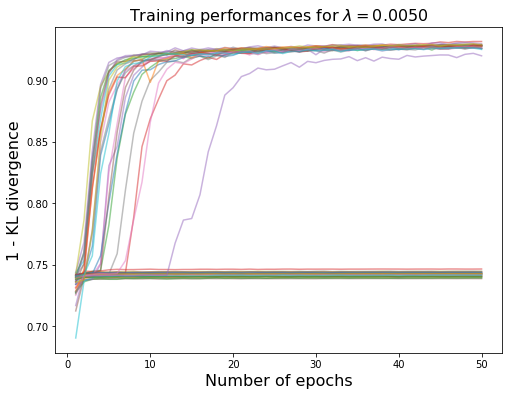

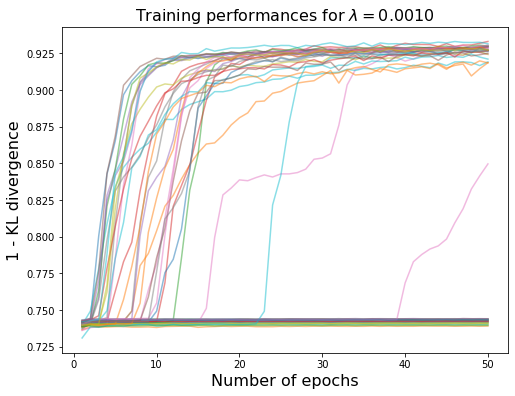

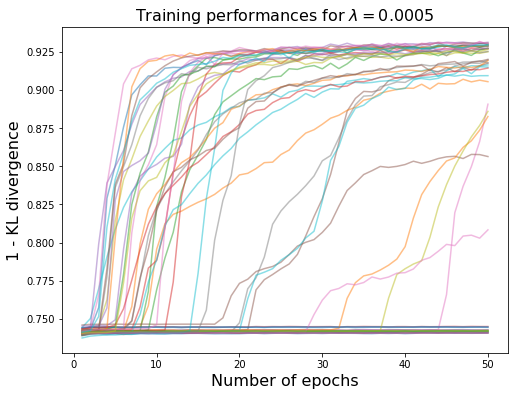

In [26]:
n_runs = len(V_train_runs)
n_epochs = np.arange(V_train_runs.shape[-1])+1

for j, lr in enumerate(lambdas):
    fig = plt.figure(figsize=(8,6))
    for i in range(n_runs):
        plt.plot(n_epochs, V_train_runs[i,j,:], alpha=0.5)
    plt.title(r"Training performances for $\lambda=%.4f$"%lambdas[j], fontsize=16)
    plt.xlabel("Number of epochs", fontsize=16)
    plt.ylabel("1 - KL divergence", fontsize=16)
    plt.show()

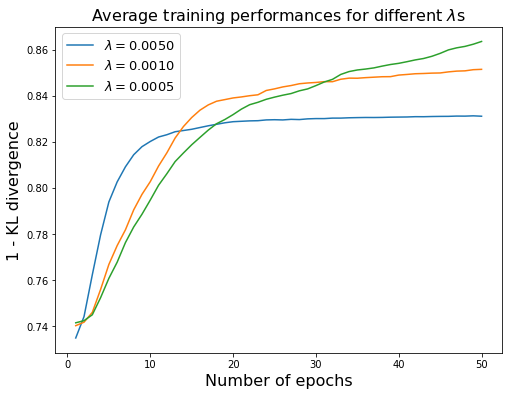

In [27]:
n_runs = len(V_train_runs)
n_epochs = np.arange(V_train_runs.shape[-1])+1


fig = plt.figure(figsize=(8,6))
for j, lr in enumerate(lambdas):
    plt.plot(n_epochs, V_train_runs.mean(axis=0)[j,:], alpha=1, label=r'$\lambda=%.4f$'%lambdas[j])
plt.title(r"Average training performances for different $\lambda$s", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.ylabel("1 - KL divergence", fontsize=16)
plt.legend(fontsize = 13)
plt.show()

In [28]:
value_priors_dict = {'n_kernels':([12, 24, 36], [1/3, 1/3, 1/3]),
                     'n_features':([16, 32, 64, 128, 256], [0.15, 0.2, 0.3, 0.2, 0.15]),
                     'n_heads':([1, 2, 4, 8],[0.1, 0.4, 0.4, 0.1]),
                     'n_attn_modules':([2,4,6,8],[1/4, 1/4, 1/4, 1/4]),
                     'feature_hidden_dim':([16, 32, 64, 128, 256], [0.15, 0.2, 0.3, 0.2, 0.15]),
                     'feature_n_residuals':([1, 2, 4, 8],[0.1, 0.4, 0.4, 0.1])
                     }

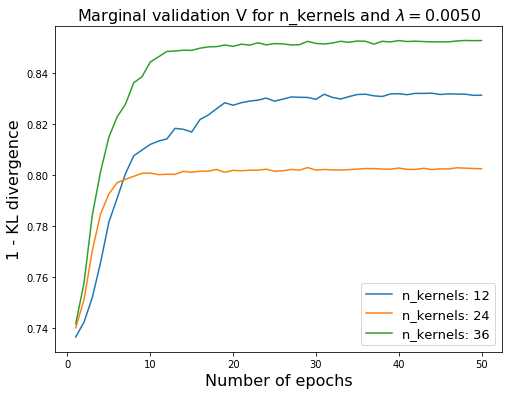

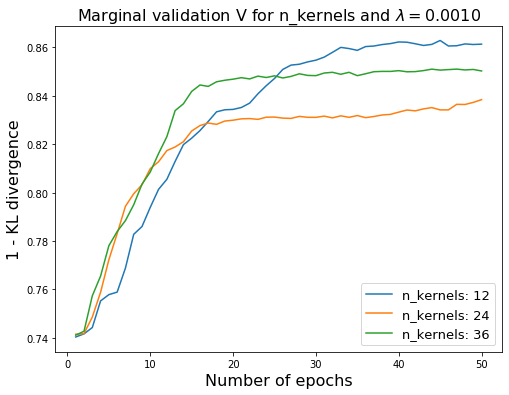

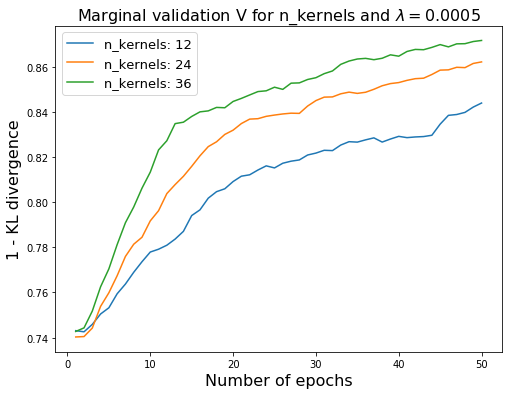

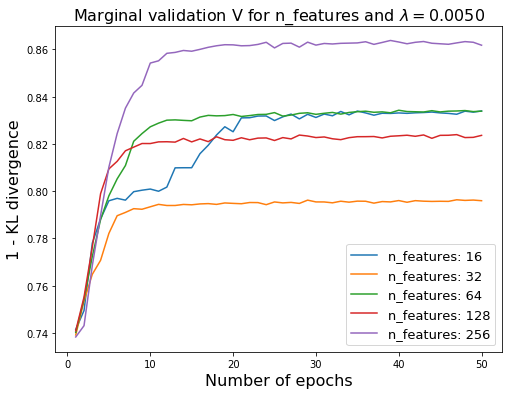

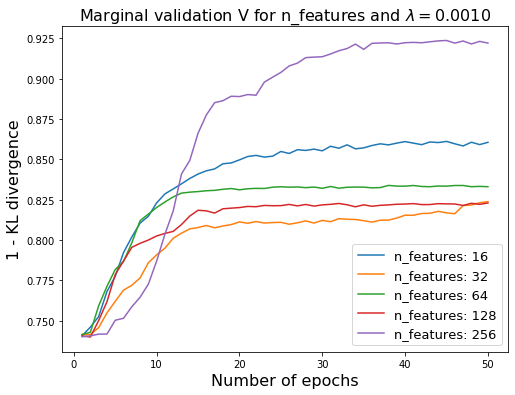

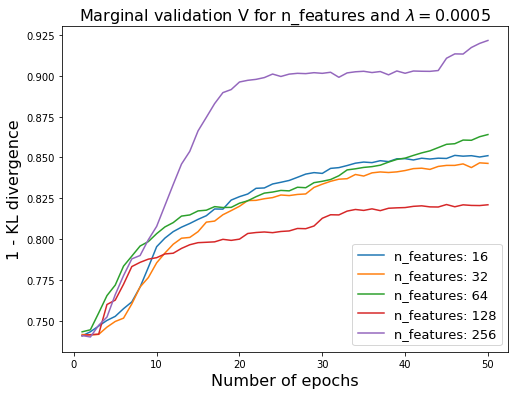

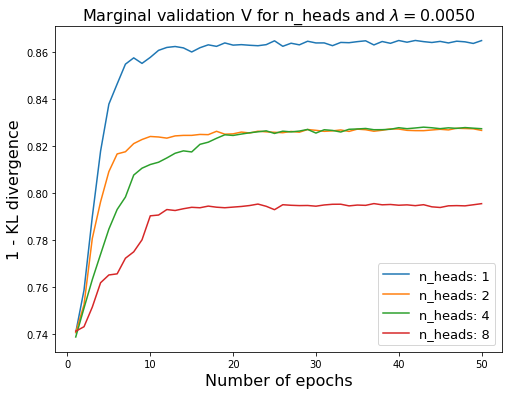

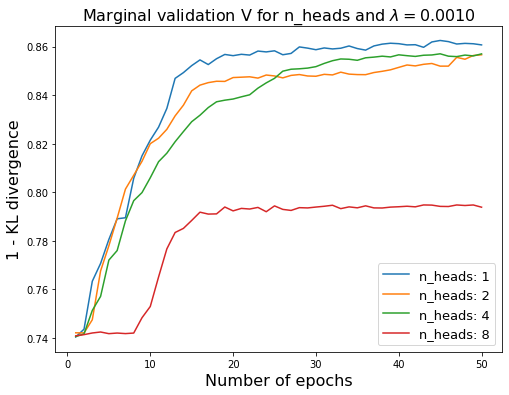

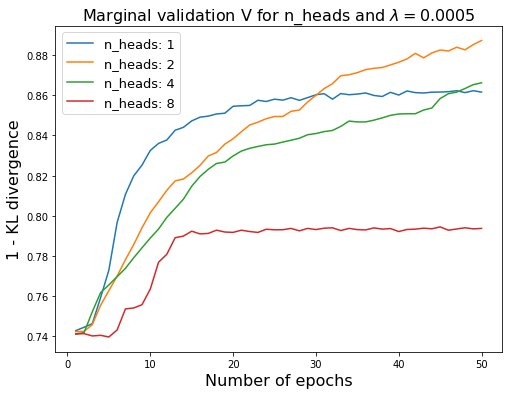

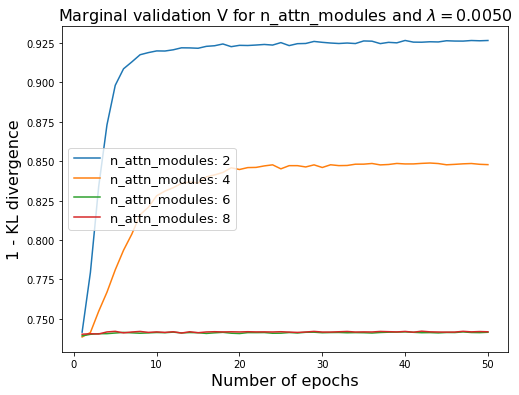

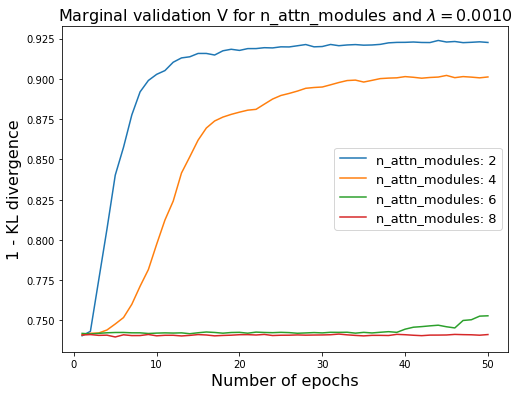

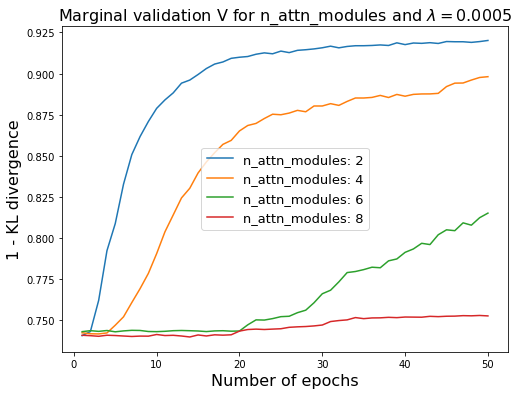

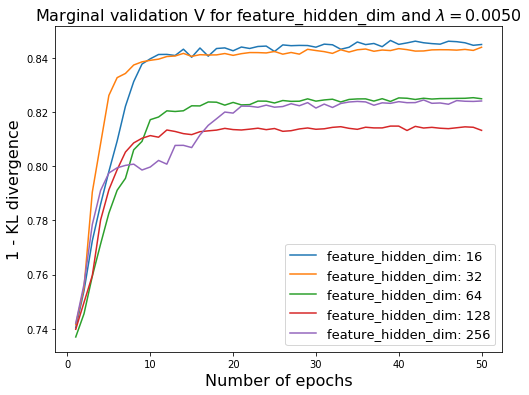

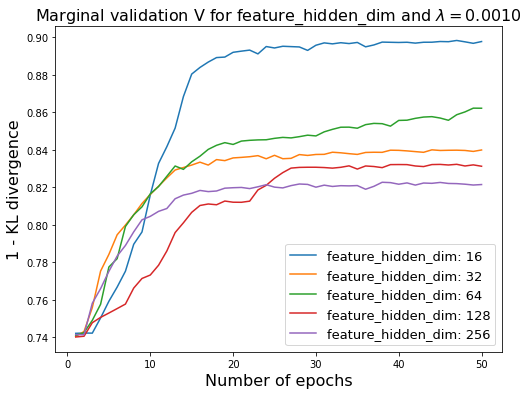

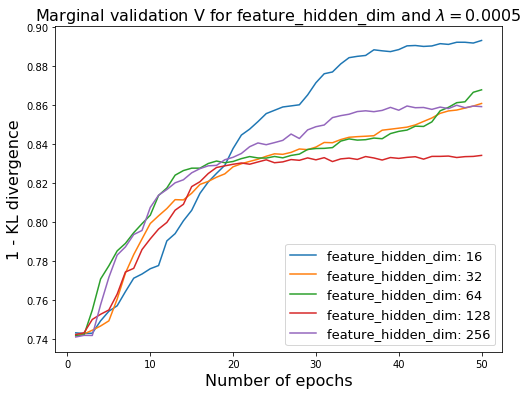

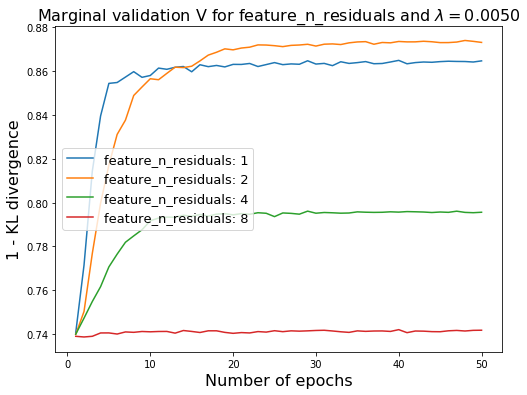

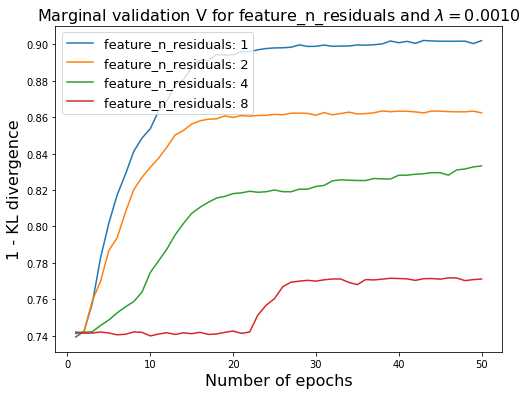

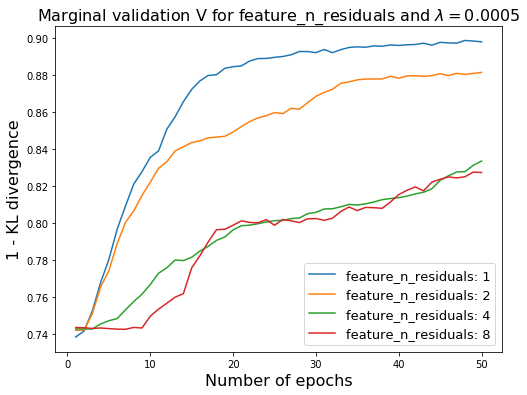

In [29]:
# Now all together
keys = value_priors_dict.keys()
for k in keys:
    # Init dictionary 
    key_value_hist = {}
    for v in value_priors_dict[k][0]:
        key_value_hist[str(v)] = []
    key_value_hist.keys()
    
    # Divide runs for values of the selected HP
    for i in range(len(HPs_runs)):
        for v in key_value_hist:
            if str(HPs_runs[i][k]) == v:
                key_value_hist[v].append(V_val_runs[i])

    # Convert in numpy arrays
    for v in key_value_hist:
        key_value_hist[v] = np.array(key_value_hist[v])
    
    n_epochs = np.arange(V_val_runs.shape[-1])+1

    # 1 plot for each lr, as many curves as values
    for j, lr in enumerate(lambdas):
        fig = plt.figure(figsize=(8,6))
        for v in key_value_hist:
            plt.plot(n_epochs, key_value_hist[v].mean(axis=0)[j,:], alpha=1, label=k+': '+v)
        plt.title(r"Marginal validation V for "+k+" and $\lambda=%.4f$"%lambdas[j], fontsize=16)
        plt.xlabel("Number of epochs", fontsize=16)
        plt.ylabel("1 - KL divergence", fontsize=16)
        plt.legend(fontsize = 13)
        plt.show()

So from this analysis I would choose:
1. n_kernels = 36
2. n_features = 256
3. n_heads = 1 (or 2 at most)
4. n_attn_modules = 2
5. feature_hidden_dim = 16
6. feature_n_residuals = 1

In [30]:
best_HPs = bayes_HP_tuning.return_best_model()
best_HPs

{'n_kernels': 36,
 'n_features': 64,
 'n_heads': 2,
 'n_attn_modules': 2,
 'feature_hidden_dim': 64,
 'feature_n_residuals': 2}

What happens instead is that probably the prior is shifting the results

In [31]:
for param_name in bayes_HP_tuning.params:
    param = bayes_HP_tuning.params[param_name]
    # Probability distribution learned with current rules
    probs = param.get_updated_sampling_probs()
    print("Param name: "+param_name)
    print("probs: ", probs)
    print("priors: ", param.priors)

Param name: n_kernels
probs:  [0.32966611 0.32657986 0.34375402]
priors:  [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Param name: n_features
probs:  [0.17975841 0.19670197 0.22338714 0.19977999 0.20037249]
priors:  [0.15, 0.2, 0.3, 0.2, 0.15]
Param name: n_heads
probs:  [0.21244894 0.31132136 0.2975287  0.178701  ]
priors:  [0.1, 0.4, 0.4, 0.1]
Param name: n_attn_modules
probs:  [0.29892379 0.26659955 0.2184616  0.21601506]
priors:  [0.25, 0.25, 0.25, 0.25]
Param name: feature_hidden_dim
probs:  [0.18797577 0.2051346  0.22680467 0.19832449 0.18176048]
priors:  [0.15, 0.2, 0.3, 0.2, 0.15]
Param name: feature_n_residuals
probs:  [0.22383814 0.32072217 0.28767653 0.16776316]
priors:  [0.1, 0.4, 0.4, 0.1]


In [32]:
chosen_HPs = {'n_kernels': 36,
              'n_features': 256,
              'n_heads': 1,
              'n_attn_modules': 2,
              'feature_hidden_dim': 16,
              'feature_n_residuals': 1}

In [22]:
import string
import random

save = True
keywords = ['chosen-residual'] # example

if save:
    save_dir = 'Results/Sandbox/Supervised/'
    ID = ''.join([random.choice(string.ascii_letters) for _ in range(4)])
    ID = ID.upper()
    keywords.append(ID)
    filename = '_'.join(keywords)
    filename = 'S_'+filename
    print("Save at "+save_dir+"best_HP_"+filename)
    torch.save(chosen_HPs, save_dir+"best_HP_"+filename)
else:
    print("Nothing saved")
    pass

Save at Results/Sandbox/Supervised/best_HP_S_chosen-residual_UMUT
